# Trabajo práctico Machine Learning 

#### Se utilizará este [dataset](https://www.kaggle.com/datasets/tawfikelmetwally/employee-dataset/) para realizar el trabajo práctico.

# Listado de variables y selección

## Variables de entrada

1. **Education**
   - **Descripción**: Nivel de educación del empleado.
   - **Posibles valores**: Bachelors, Masters, PHD.
   - **Uso**: Variable de entrada.
   - **Motivo**: El nivel de educación puede influir en la probabilidad de que un empleado deje la empresa

2. **JoiningYear**
   - **Descripción**: Año en que el empleado se unió a la empresa.
   - **Posibles valores**: 2017, 2013, 2014, 2016, 2015, 2012, 2018
   - **Uso**: Variable de entrada.
   - **Motivo**: El tiempo que un empleado ha estado en la empresa puede afectar su decisión de quedarse o irse.

3. **City**
   - **Descripción**: Ciudad en la que trabaja el empleado.
   - **Posibles valores**: Bangalore, Pune, New Delhi
   - **Uso**: Variable de entrada.
   - **Motivo**: La ubicación geográfica puede tener un impacto en la retención de empleados.

4. **PaymentTier**
   - **Descripción**: Nivel de pago del empleado (1, 2 o 3).
   - **Posibles valores**: 3, 1, 2
   - **Uso**: Variable de entrada.
   - **Motivo**: El nivel de pago puede influir en la satisfacción y retención del empleado.

5. **Age**
   - **Descripción**: Edad del empleado.
   - **Posibles valores**: 34, 28, 38, 27, 24, 22, 23, 37, 32, 39, 29, 30, 36, 31, 25, 26, 40, 35, 33, 41
   - **Uso**: Variable de entrada.
   - **Motivo**: La edad puede ser un factor importante en la decisión de un empleado de dejar la empresa.

6. **Gender**
   - **Descripción**: Género del empleado.
   - **Posibles valores**: Male, Female
   - **Uso**: Variable de entrada.
   - **Motivo**: El género puede influir en las decisiones de carrera y retención.

7. **EverBenched**
   - **Descripción**: Indica si el empleado ha estado alguna vez sin proyectos asignados.
   - **Posibles valores**: No, Yes
   - **Uso**: Variable de entrada.
   - **Motivo**: Estar sin proyectos puede afectar la moral y la decisión de un empleado de dejar la empresa.

8. **ExperienceInCurrentDomain**
   - **Descripción**: Años de experiencia del empleado en su dominio actual.
   - **Posibles valores**: 0, 3, 2, 5, 1, 4, 7, 6
   - **Uso**: Variable de entrada.
   - **Motivo**: La experiencia en el dominio actual puede influir en la estabilidad del empleo.

## Variable Target

9. **LeaveOrNot**
   - **Descripción**: Indica si el empleado ha dejado la empresa (1) o no (0).
   - **Posibles valores**: 0, 1
   - **Uso**: Variable de salida.
   - **Motivo**: Esta es la variable objetivo que estamos tratando de predecir. Los valores posibles son 0 (No dejó la empresa) y 1 (Dejó la empresa).

## Variables no utilizadas

No hay variables que no se vayan a utilizar, ya que todas parecen relevantes para el análisis de la retención de empleados.


# 2.  Análisis detallado de un conjunto de variables

In [1]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats

In [2]:
# Utils

# Transform features to snake case
def to_snake_case(name):
    # Reemplaza espacios y caracteres especiales por guiones bajos
    name = re.sub(r'[\s]+', '_', name)  # Reemplaza espacios por guiones bajos
    name = re.sub(r'(?<!^)(?<!_)(?<!\s)(?<![A-Z])(?=[A-Z])', '_', name)
    # Convierte a minúsculas y reemplaza múltiples guiones bajos consecutivos por uno solo
    name = re.sub(r'_{2,}', '_', name)
    return name.lower()

In [3]:
# Cargar el conjunto de datos
df_employee = pd.read_csv('employee.csv')

# Renombrar columnas a snake case
df_employee.columns = [to_snake_case(col) for col in df_employee.columns]

# Mostrar las primeras filas del DataFrame para verificar los cambios
df_employee.head()

,education,joining_year,city,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


## Análisis previo

In [4]:
print(f'El dataset cuenta con {df_employee.shape[0]} filas y {df_employee.shape[1]} columnas.')

El dataset cuenta con 4653 filas y 9 columnas.


### Valores únicos por feature

In [5]:
# Obtener valores únicos por columna
for column in df_employee.columns:
    print(f'{column}: {df_employee[column].unique()}')

education: ['Bachelors' 'Masters' 'PHD']
joining_year: [2017 2013 2014 2016 2015 2012 2018]
city: ['Bangalore' 'Pune' 'New Delhi']
payment_tier: [3 1 2]
age: [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
gender: ['Male' 'Female']
ever_benched: ['No' 'Yes']
experience_in_current_domain: [0 3 2 5 1 4 7 6]
leave_or_not: [0 1]


### Tipos de datos de cada feature

In [6]:
print(df_employee.dtypes.reset_index(name='type').rename(columns={'index': 'column'}).set_index('column'))


                                type
column                              
education                     object
joining_year                   int64
city                          object
payment_tier                   int64
age                            int64
gender                        object
ever_benched                  object
experience_in_current_domain   int64
leave_or_not                   int64


### Cantidad de nulos por feature

In [7]:
# Verificar la cantidad de valores nulos en cada columna
df_employee.isnull().sum()

education                       0
joining_year                    0
city                            0
payment_tier                    0
age                             0
gender                          0
ever_benched                    0
experience_in_current_domain    0
leave_or_not                    0
dtype: int64

### Estadísticos generales

In [8]:
df_employee.describe().round(2)

,joining_year,payment_tier,age,experience_in_current_domain,leave_or_not
count,4653.00,4653.00,4653.00,4653.00,4653.00
mean,2015.06,2.70,29.39,2.91,0.34
std,1.86,0.56,4.83,1.56,0.48
min,2012.00,1.00,22.00,0.00,0.00
25%,2013.00,3.00,26.00,2.00,0.00
50%,2015.00,3.00,28.00,3.00,0.00
75%,2017.00,3.00,32.00,4.00,1.00
max,2018.00,3.00,41.00,7.00,1.00


### 1. Tendencias de contratación (`joining_year`)
La mayoría de los empleados se unieron entre 2013 y 2017, con una media de 2015, indicando que quizás la empresa ha tenido una política de contratación activa durante este período, lo que sugiere que la antigüedad en la empresa podría ser una característica importante a considerar en un modelo predictivo sobre la rotación de empleados.

### 2. Niveles de pago (`payment_tier`)
La mayoría de los empleados están en el nivel 3 de pago, con una media de 2.70 y una desviación estándar baja (0.56), lo que sugiere que el nivel de pago podría estar correlacionado con la retención y la experiencia, y que explorar cómo estos niveles afectan la rotación de empleados podría ser útil.

### 3. Edad (`age`)
La edad promedio es de 29.39 años, con un rango de 22 a 41 años y la mayoría de los empleados tienen entre 26 y 32 años, y podemos inferir que la edad puede influir en la experiencia y la estabilidad en el trabajo.

### 4. Experiencia en el dominio actual (`experience_in_current_domain`)
La experiencia promedio en el dominio actual es de 2.91 años, con un rango de 0 a 7 años y la mayoría de los empleados tienen entre 2 y 4 años de experiencia.

### 5. Rotación de empleados (`leave_or_not`)
Aproximadamente el 34% de los empleados han dejado la empresa, con una distribución equilibrada entre los que se quedan y los que se van.


In [9]:
# Calcular la distribución de la variable de salida
leaveornot_distribution = df_employee['leave_or_not'].value_counts(normalize=True)
print(leaveornot_distribution)

leave_or_not
0    0.656136
1    0.343864
Name: proportion, dtype: float64


### Conclusiones 

- El 65.6% de los empleados del dataset no han dejado la empresa, mientras que 34.4% de los empleados han dejado la empresa.

- Aunque no es un equilibrio perfecto, la distribución entre los que se quedan y los que se van no está extremadamente desbalanceada. Sin embargo, aún hay una diferencia notable, con una mayoría que se queda.

- La retención de empleados parece ser relativamente alta, con más de la mitad de los empleados permaneciendo en la empresa. Esto podría indicar una buena satisfacción laboral o políticas efectivas de retención.

### Para la variable de salida, explicar y graficar su distribución. Analizar posibles consecuencias o consideraciones a tener en cuenta.

1. Descripción de la variable de salida
La variable de salida leave_or_not es binaria y representa si un empleado ha dejado la empresa (1) o no (0).

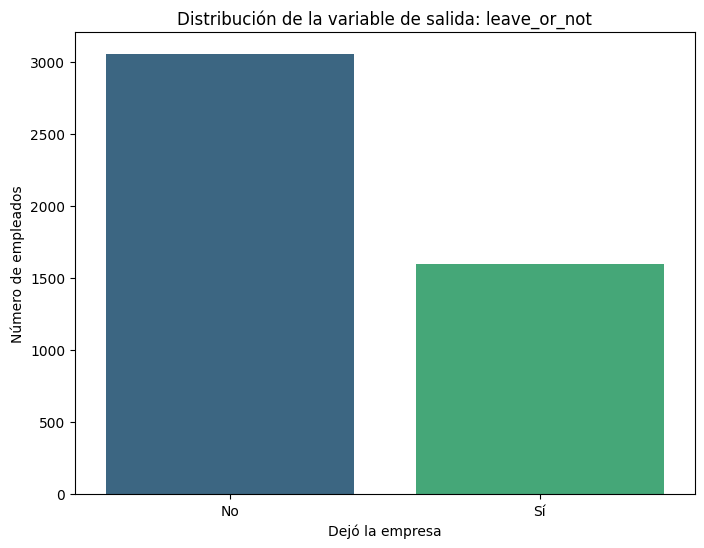

In [10]:
# Graficar la distribución de `leave_or_not`
plt.figure(figsize=(8, 6))
sns.countplot(x='leave_or_not', data=df_employee, hue='leave_or_not', palette='viridis', legend=False)
plt.title('Distribución de la variable de salida: leave_or_not')
plt.xlabel('Dejó la empresa')
plt.ylabel('Número de empleados')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

# Preprocesamiento de datos

### Feature gender

Es necesario realizar la comprobación y conversión de la columna *gender* a valor numerico por varias razones: si bien como vimos anteriormente no tenemos datos nulls en esta columna, los modelos de machine learning generalmente requieren que las variables categóricas sean numéricas, y convertir Male a 1 y Female a 0 estandariza esta variable. 
Además, las conversiones a valores numéricos permiten que los datos sean procesados de manera más eficiente.

In [11]:
# Comprobación y conversión de la columna `gender`
df_employee['gender'] = df_employee['gender'].apply(lambda x: 1 if x == 'Male' else (0 if x == 'Female' else x))

# Si el valor es 'Male', lo convierte en 1.
# Si el valor es 'Female', lo convierte en 0.
    
# Obtener una muestra aleatoria del DataFrame
df_employee.sample(5)


,education,joining_year,city,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not
4256,Bachelors,2013,Bangalore,3,33,1,No,2,0
248,Bachelors,2016,Pune,3,26,1,No,4,0
1494,Bachelors,2017,Pune,2,26,0,No,4,1
4266,PHD,2013,Bangalore,3,40,1,No,1,0
4592,Bachelors,2013,New Delhi,3,28,0,No,0,1


### Feature ever_benched

Convertir los valores de ever_benched a int (0 y 1) asegura que la columna tenga un tipo de datos consistente. 

- Claridad: Los valores 0 y 1 proporcionan una indicación clara del estado de "benched".
- Eficiencia: Las operaciones y análisis sobre datos numericos pueden ser más eficientes y directos.
- Estandarización: Mantiene la columna ever_benched en un formato estandarizado.

In [12]:
# Comprobación y conversión de la columna `ever_benched`
df_employee['ever_benched'] = df_employee['ever_benched'].apply(lambda x: 1 if x == 'Yes' else (0 if x == 'No' else x))

# Si el valor es 'YES', lo convierte en 1.
# Si el valor es 'NO', lo convierte en 0.

# Obtener una muestra aleatoria del DataFrame
df_employee.sample(5)

,education,joining_year,city,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not
2032,Bachelors,2017,Pune,3,27,0,0,5,1
4569,PHD,2017,New Delhi,3,31,0,0,5,0
1773,Bachelors,2013,Pune,3,26,1,0,4,0
4455,Bachelors,2018,Bangalore,3,24,1,0,2,1
3408,Bachelors,2017,New Delhi,2,36,1,0,2,0


### Feature education y city

Es necesario realizar la codificación One-Hot en las columnas *education* y *city* por las siguientes razones:
- No suposiciones implícitas: Al usar columnas binarias, se evita cualquier suposición sobre una relación ordinal entre las categorías.
- Preparación para modelos: Facilita el uso de algoritmos de machine learning que requieren datos numéricos.
- Claridad y simplicidad: Hace que las features education y city sean más claras y fáciles de interpretar en el análisis de datos.
- Flexibilidad: Permite a los modelos captar mejor las relaciones entre las categorías y otras características.

Realizar la codificación One-Hot es una práctica estándar en el preprocesamiento de datos para asegurar que los modelos de machine learning puedan trabajar de manera eficiente.

In [13]:
# Codificación One-Hot para las columnas 'education' y 'city'
df_employee = pd.get_dummies(df_employee, columns=['education', 'city'])

# Renombrar columnas a snake case
df_employee.columns = [to_snake_case(col) for col in df_employee.columns]

# Convertir las columnas a 0 o 1
columns_to_convert = [
    'education_bachelors', 'education_masters', 'education_phd',
    'city_bangalore', 'city_new_delhi', 'city_pune'
]

df_employee[columns_to_convert] = df_employee[columns_to_convert].astype(int)

# Obtener una muestra aleatoria del DataFrame
df_employee.sample(5)

,joining_year,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not,education_bachelors,education_masters,education_phd,city_bangalore,city_new_delhi,city_pune
3843,2016,3,36,1,0,0,0,1,0,0,0,0,1
3806,2012,3,40,1,1,2,0,1,0,0,1,0,0
1690,2017,2,25,1,0,3,1,1,0,0,0,1,0
1251,2014,3,26,1,0,4,0,1,0,0,0,1,0
964,2012,3,26,1,0,4,0,1,0,0,1,0,0


## Análisis individual de cada variable de entrada que será utilizada

 ### Año de Ingreso (joining_year)

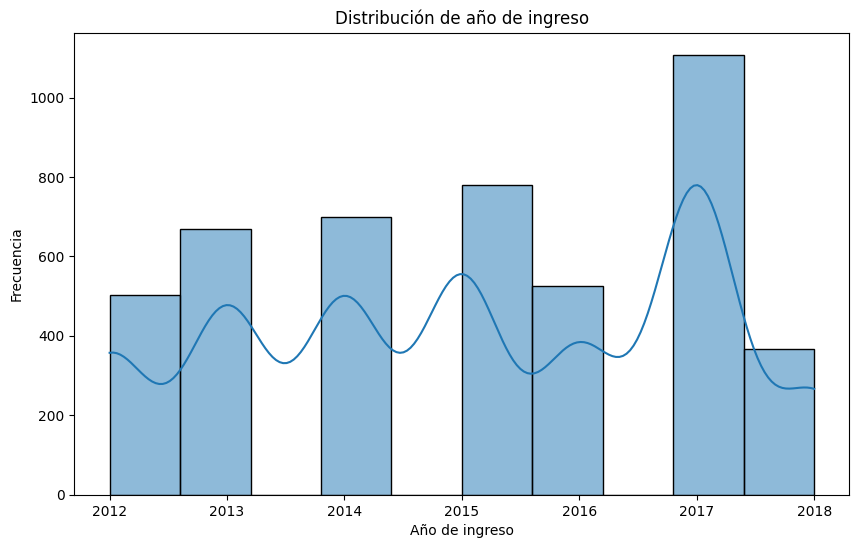

In [14]:
# Distribución de la variable joining_year
plt.figure(figsize=(10, 6))
sns.histplot(df_employee['joining_year'], bins=10, kde=True)
plt.title('Distribución de año de ingreso')
plt.xlabel('Año de ingreso')
plt.ylabel('Frecuencia')
plt.show()

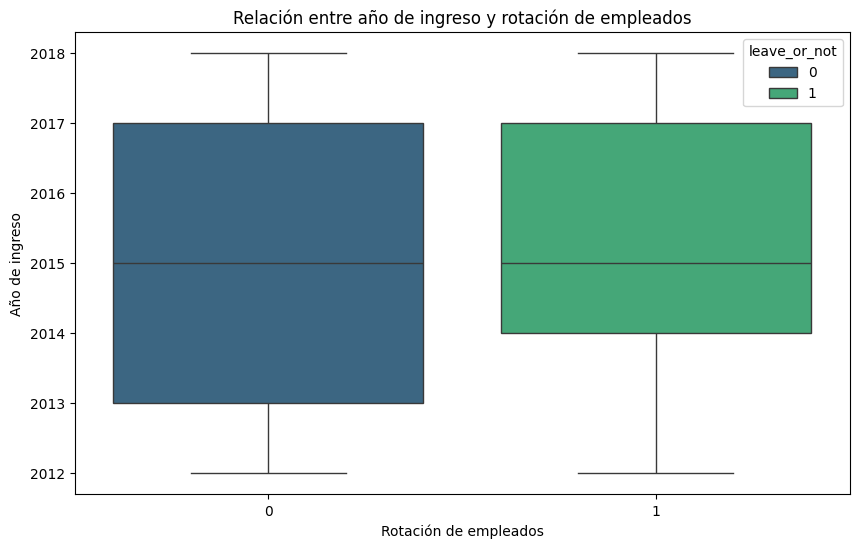

In [15]:
# Relación entre joining_year y leave_or_not
plt.figure(figsize=(10, 6))
sns.boxplot(x='leave_or_not', hue='leave_or_not', y='joining_year', data=df_employee, palette='viridis')
plt.title('Relación entre año de ingreso y rotación de empleados')
plt.xlabel('Rotación de empleados')
plt.ylabel('Año de ingreso')
plt.show()

Conclusiones:

- La mayoría de los empleados se unieron entre 2013 y 2017.
- La antigüedad en la empresa puede ser un factor importante a considerar en la predicción de la rotación.

## Nivel de pago (payment_tier)

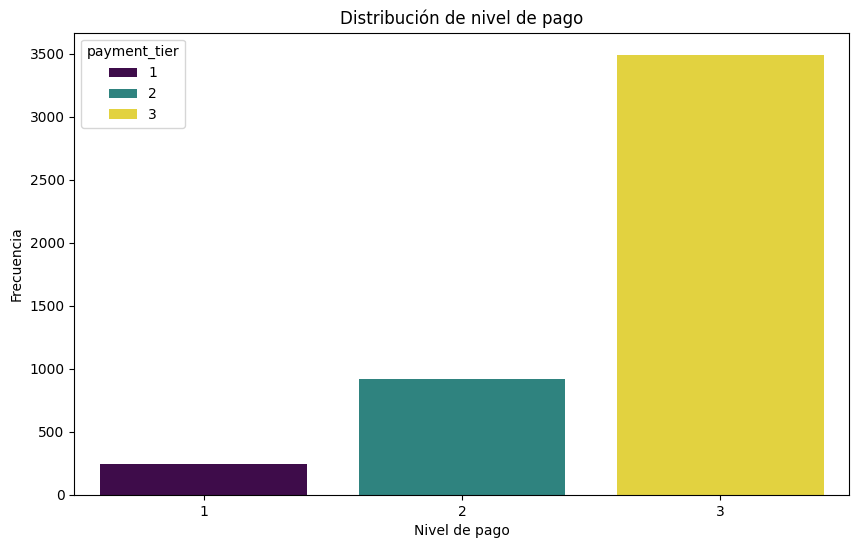

In [16]:
# Distribución de la variable payment_tier
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_tier', hue= 'payment_tier', data=df_employee, palette='viridis')
plt.title('Distribución de nivel de pago')
plt.xlabel('Nivel de pago')
plt.ylabel('Frecuencia')
plt.show()

Conclusiones:

- La mayoría de los empleados están en el nivel 3 de pago.
- Puede existir una relación entre el nivel de pago y la probabilidad de rotación.

 ## Edad (age)

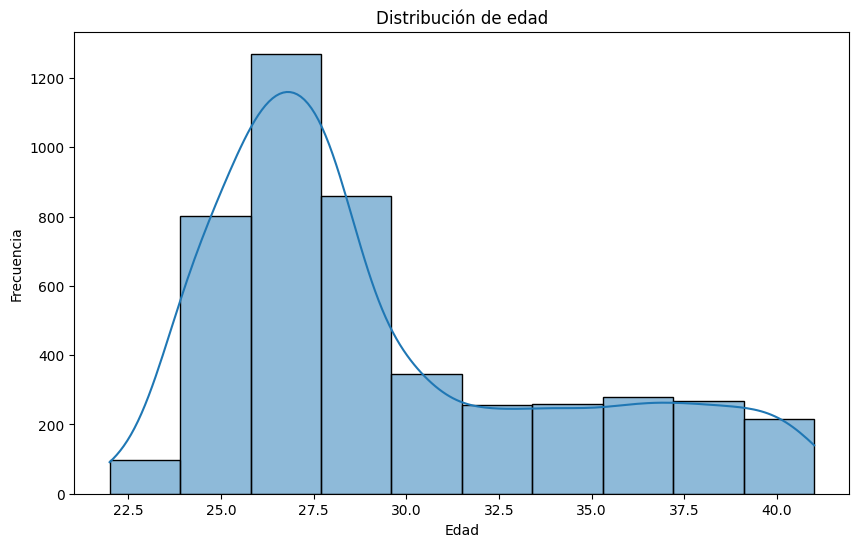

In [17]:
# Distribución de la variable age
plt.figure(figsize=(10, 6))
sns.histplot(df_employee['age'], bins=10, kde=True)
plt.title('Distribución de edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

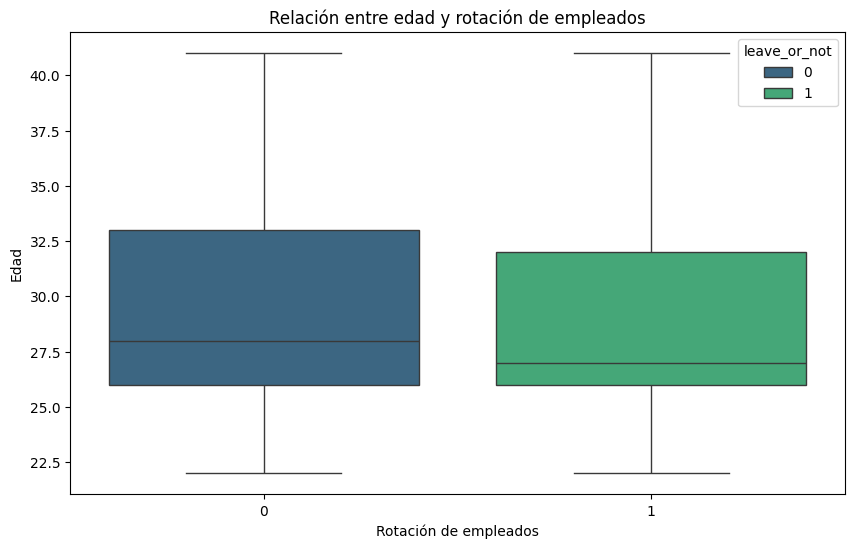

In [18]:
# Relación entre age y leave_or_not
plt.figure(figsize=(10, 6))
sns.boxplot(x='leave_or_not', hue='leave_or_not', y='age', data=df_employee, palette='viridis')
plt.title('Relación entre edad y rotación de empleados')
plt.xlabel('Rotación de empleados')
plt.ylabel('Edad')
plt.show()

Conclusiones:

- La edad promedio de los empleados es de alrededor de 29 años.
- La edad puede ser un factor determinante en la estabilidad laboral.

## Género (gender)

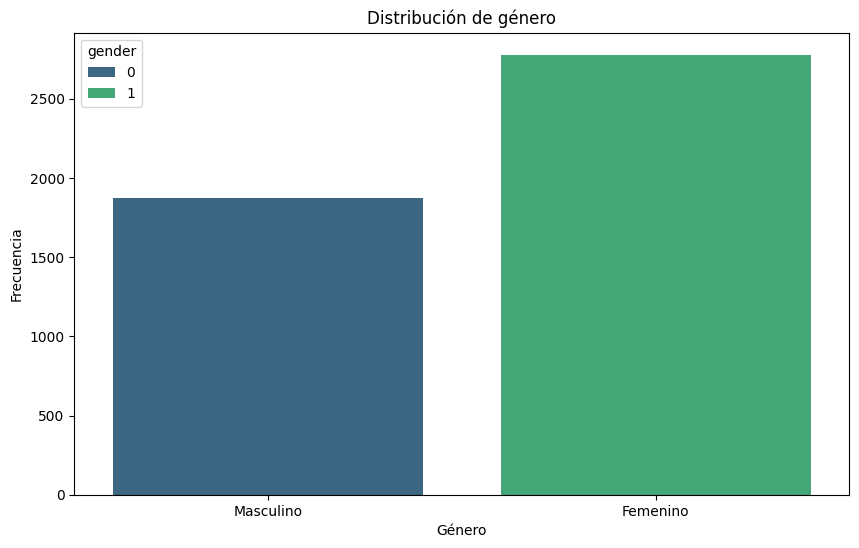

In [19]:
# Distribución de la variable gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue= 'gender', data=df_employee, palette='viridis')
plt.title('Distribución de género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['Masculino', 'Femenino'])
plt.show()

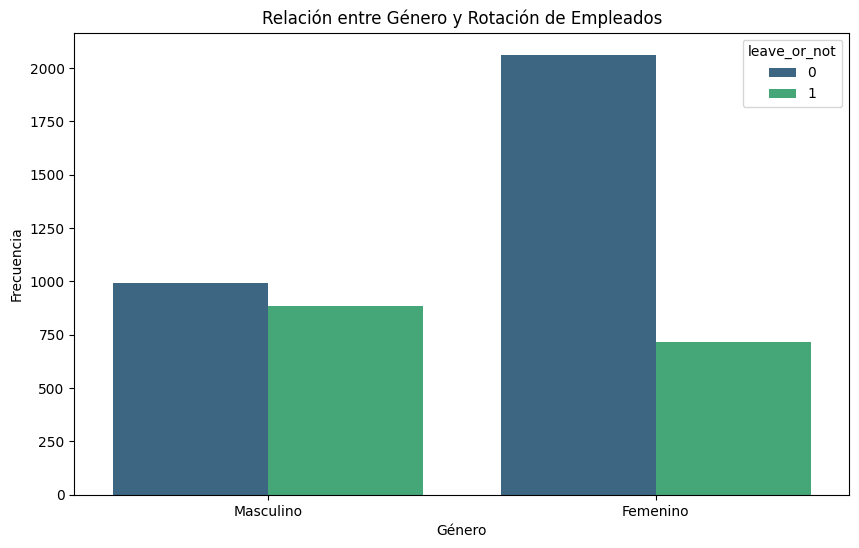

In [20]:
# Relación entre gender y leave_or_not
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='leave_or_not', data=df_employee, palette='viridis')
plt.title('Relación entre Género y Rotación de Empleados')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks([0, 1], ['Masculino', 'Femenino'])
plt.show()

Conclusiones:

- Existe una distribución relativamente equilibrada entre géneros.
- Puede ser útil investigar si el género tiene una influencia significativa en la rotación.

## Experiencia en el dominio actual (experience_in_current_domain)

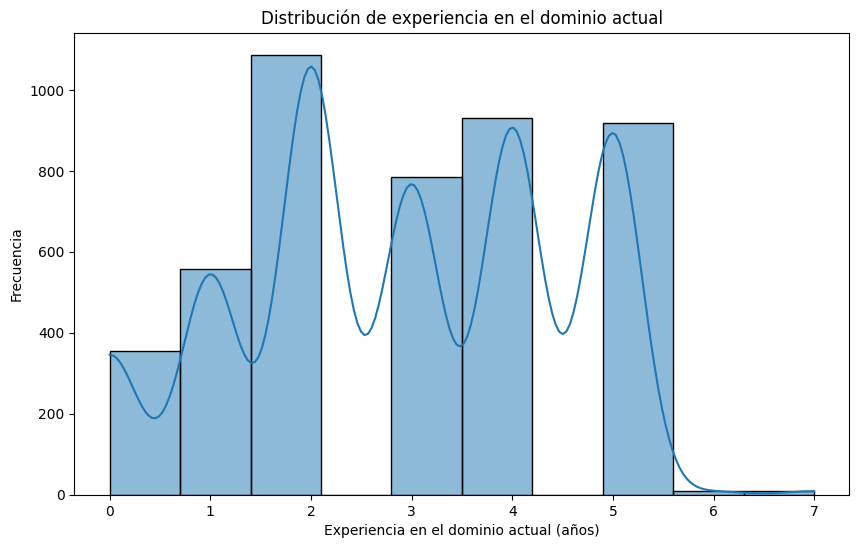

In [21]:
# Distribución de la variable experience_in_current_domain
plt.figure(figsize=(10, 6))
sns.histplot(df_employee['experience_in_current_domain'], bins=10, kde=True)
plt.title('Distribución de experiencia en el dominio actual')
plt.xlabel('Experiencia en el dominio actual (años)')
plt.ylabel('Frecuencia')
plt.show()

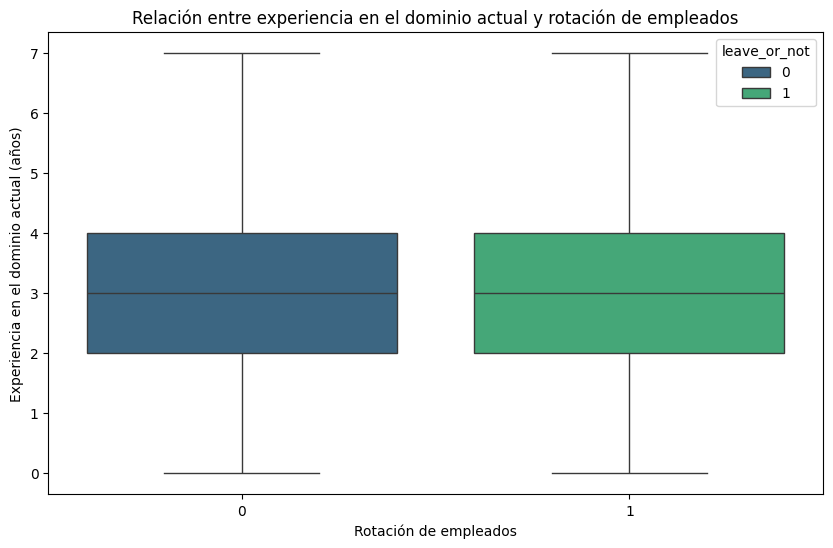

In [22]:
# Relación entre experience_in_current_domain y leave_or_not
plt.figure(figsize=(10, 6))
sns.boxplot(x='leave_or_not', hue='leave_or_not', y='experience_in_current_domain', data=df_employee, palette='viridis')
plt.title('Relación entre experiencia en el dominio actual y rotación de empleados')
plt.xlabel('Rotación de empleados')
plt.ylabel('Experiencia en el dominio actual (años)')
plt.show()

Conclusiones:

- La mayoría de los empleados tienen entre 2 y 4 años de experiencia en su dominio actual.
- La experiencia en el dominio puede estar correlacionada con la retención de empleados.

## ever_benched

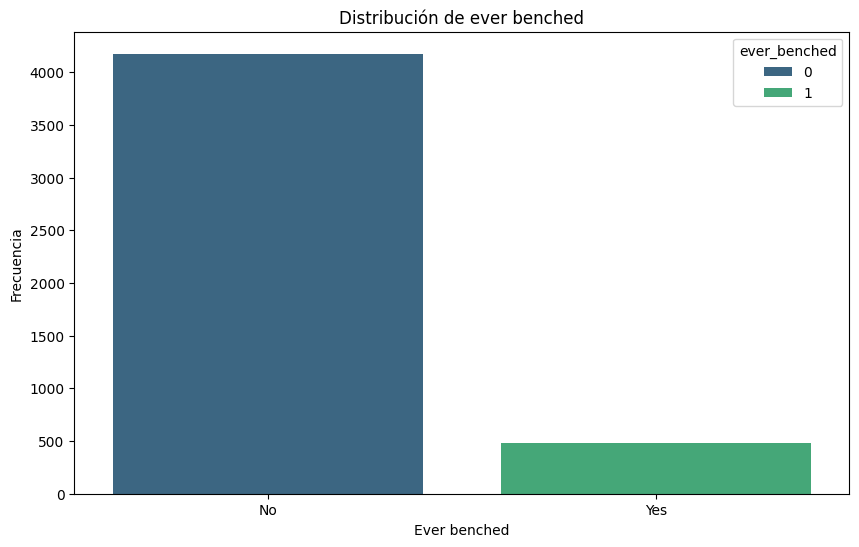

In [23]:
# Distribución de la variable ever_benched
plt.figure(figsize=(10, 6))
sns.countplot(x='ever_benched', hue= 'ever_benched', data=df_employee, palette='viridis')
plt.title('Distribución de ever benched')
plt.xlabel('Ever benched')
plt.ylabel('Frecuencia')
plt.xticks([False, True], ['No', 'Yes'])
plt.show()

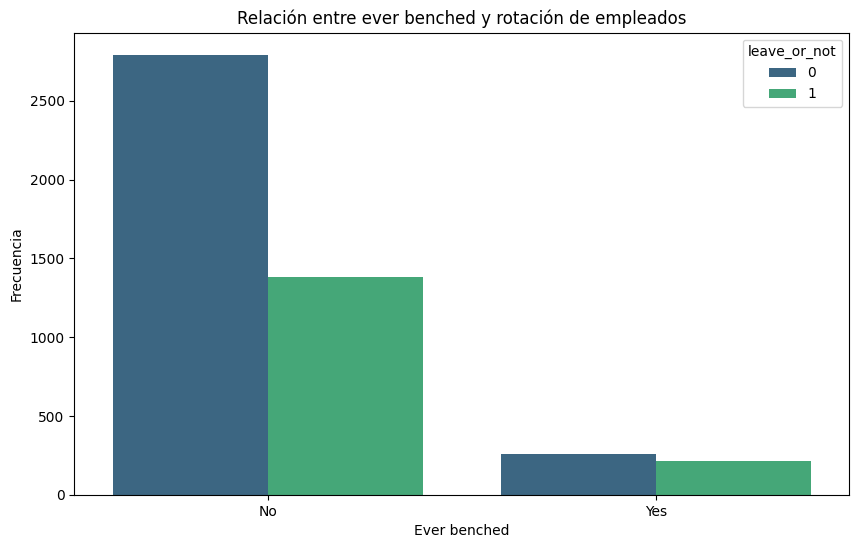

In [24]:
# Relación entre ever_benched y leave_or_not
plt.figure(figsize=(10, 6))
sns.countplot(x='ever_benched', hue='leave_or_not', data=df_employee, palette='viridis')
plt.title('Relación entre ever benched y rotación de empleados')
plt.xlabel('Ever benched')
plt.ylabel('Frecuencia')
plt.xticks([False, True], ['No', 'Yes'])
plt.show()

Conclusiones:

- La mayoría de los empleados no han sido 'benched'.
- Ser 'benched' podría tener un impacto significativo en la rotación de empleados.

## Educación (education)

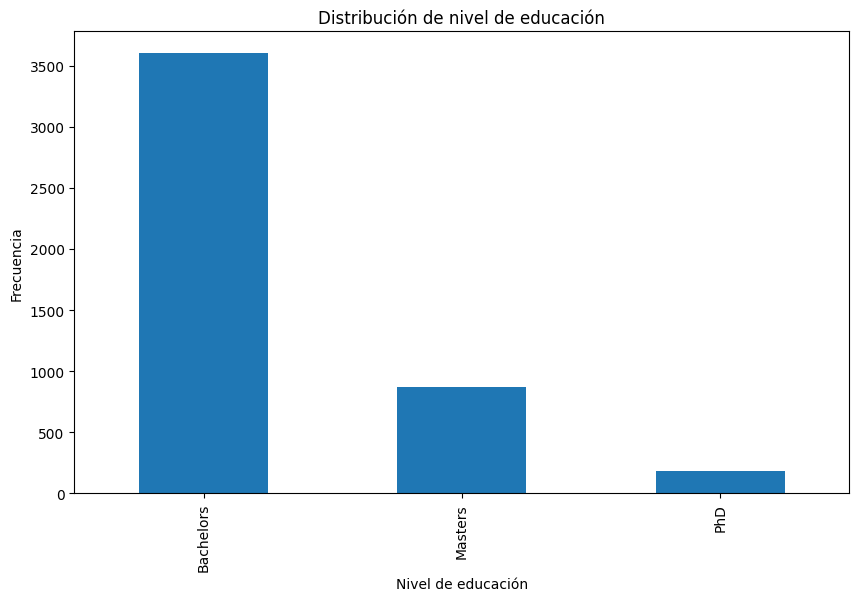

In [25]:
# Distribución de la variable education
plt.figure(figsize=(10, 6))
education_counts = df_employee[['education_bachelors', 'education_masters', 'education_phd']].sum()
education_counts.plot(kind='bar')
plt.title('Distribución de nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2], ['Bachelors', 'Masters', 'PhD'])
plt.show()

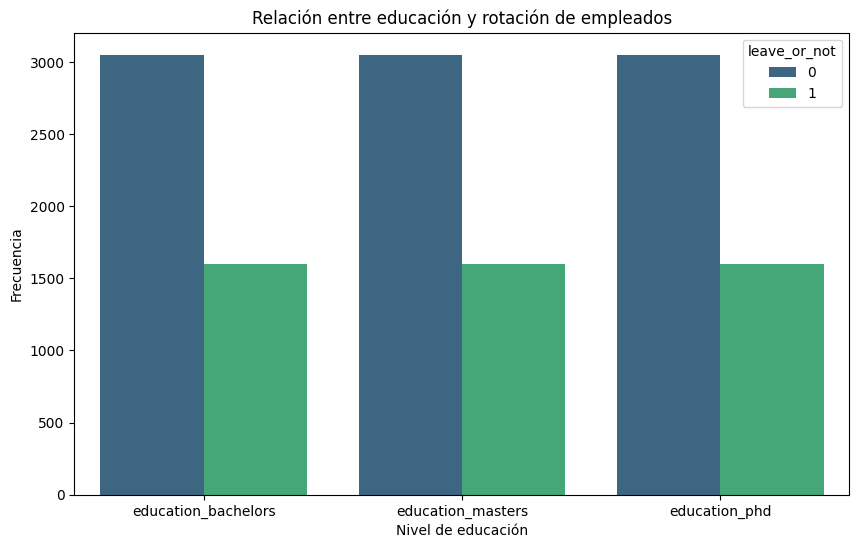

In [26]:
# Relación entre education y leave_or_not
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='leave_or_not', data=df_employee.melt(id_vars='leave_or_not', value_vars=['education_bachelors', 'education_masters', 'education_phd'], var_name='education', value_name='value'), palette='viridis')
plt.title('Relación entre educación y rotación de empleados')
plt.xlabel('Nivel de educación')
plt.ylabel('Frecuencia')
plt.show()

Conclusiones:

- La mayoría de los empleados tienen un título de bachiller o una maestría.
- Es importante analizar si el nivel educativo afecta la rotación de empleados.

## Ciudad (city)

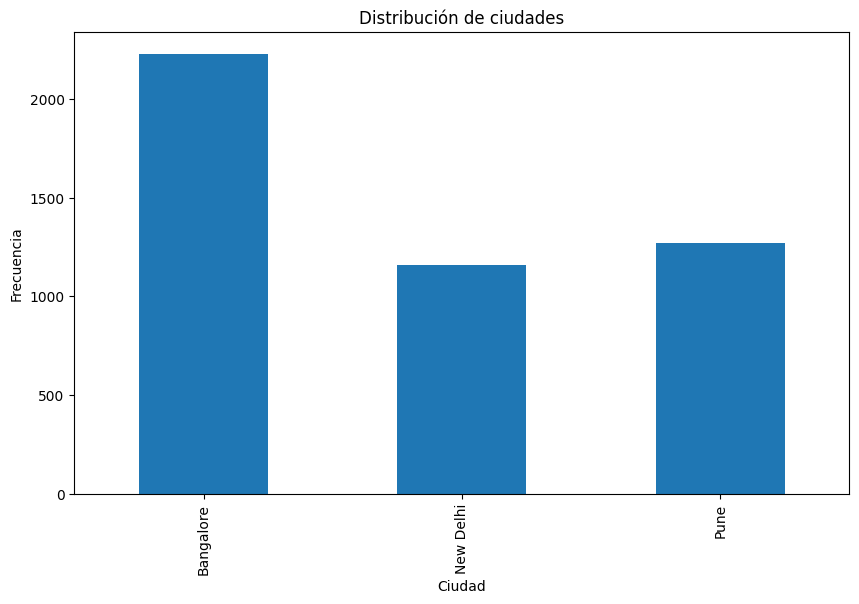

In [27]:
# Distribución de la variable city
plt.figure(figsize=(10, 6))
city_counts = df_employee[['city_bangalore', 'city_new_delhi', 'city_pune']].sum()
city_counts.plot(kind='bar')
plt.title('Distribución de ciudades')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.xticks([0, 1, 2], ['Bangalore', 'New Delhi', 'Pune'])
plt.show()

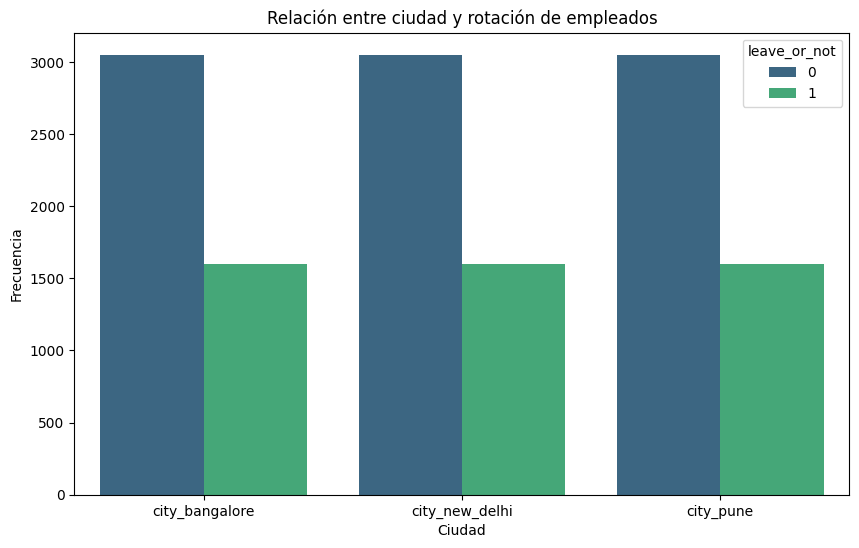

In [28]:
# Relación entre city y leave_or_not
plt.figure(figsize=(10, 6))
sns.countplot(x='city', hue='leave_or_not', data=df_employee.melt(id_vars='leave_or_not', value_vars=['city_bangalore', 'city_new_delhi', 'city_pune'], var_name='city', value_name='value'), palette='viridis')
plt.title('Relación entre ciudad y rotación de empleados')
plt.xlabel('Ciudad')
plt.ylabel('Frecuencia')
plt.show()

Conclusiones:

- La distribución de empleados es bastante uniforme entre las ciudades.

## Outliders

In [81]:
# Filtrar solo las columnas numéricas
df_numeric = df_employee.select_dtypes(include=[np.number])

# Calcular Q1 y Q3
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

# Identificar valores fuera del rango de 1.5*IQR
outliers = ((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).sum()
print(outliers)

joining_year                       0
payment_tier                    1161
age                                0
gender                             0
ever_benched                     478
experience_in_current_domain       0
leave_or_not                       0
education_bachelors             1052
education_masters                873
education_phd                    179
city_bangalore                     0
city_new_delhi                  1157
city_pune                          0
dtype: int64


In [80]:
# Distribución de la variable payment_tier, education_bachelors, city_new_delhi, education_masters, ever_benched
columns_to_check = [
    'payment_tier', 'education_bachelors', 'city_new_delhi',
    'education_masters', 'ever_benched'
]

for column in columns_to_check:
    print(f"Value counts for {column}:\n{df_employee[column].value_counts()}\n")

Value counts for payment_tier:
payment_tier
3    3492
2     918
1     243
Name: count, dtype: int64

Value counts for education_bachelors:
education_bachelors
1    3601
0    1052
Name: count, dtype: int64

Value counts for city_new_delhi:
city_new_delhi
0    3496
1    1157
Name: count, dtype: int64

Value counts for education_masters:
education_masters
0    3780
1     873
Name: count, dtype: int64

Value counts for ever_benched:
ever_benched
0    4175
1     478
Name: count, dtype: int64



### Conclusión
 
No es necesario preocuparse por outliers en la variable **payment_tier**, ya que la detección de outliers es inapropiada para variables categóricas u ordinales con valores definidos y limitados como 1, 2 y 3. La distribución simplemente muestra que la mayoría de los empleados están en el nivel 3, lo cual es una característica natural del dataset y no un problema de datos.

Para las variables **education_bachelors**, **city_new_delhi**, **education_masters**, y **ever_benched**, la distribución observada no indica un problema en los datos.

- education_bachelors: La mayoría de los empleados tienen un título de licenciatura, lo cual es esperable en muchos contextos laborales, especialmente si se trata de un campo que tradicionalmente requiere un título universitario.

- city_new_delhi: La menor cantidad de empleados en city_new_delhi en comparación con otras ciudades puede simplemente reflejar la distribución geográfica de la empresa, en lugar de un problema en los datos.

- education_masters: Aunque hay menos empleados con una maestría en comparación con una licenciatura, esto es coherente con la tendencia general de que menos personas obtienen grados de educación avanzada.

- ever_benched: La mayoría de los empleados nunca han sido "benched" (no asignados a proyectos), lo que podría indicar una alta tasa de ocupación en la empresa. Este no es un problema de datos, sino más bien una indicación de la eficiencia en la asignación de personal.

En resumen, las distribuciones de estas variables son consistentes con lo que se podría esperar en un entorno laboral y no sugieren la presencia de outliers o problemas de calidad de datos.



## Matriz de correlación

In [31]:
correlation_matrix = df_employee.corr()

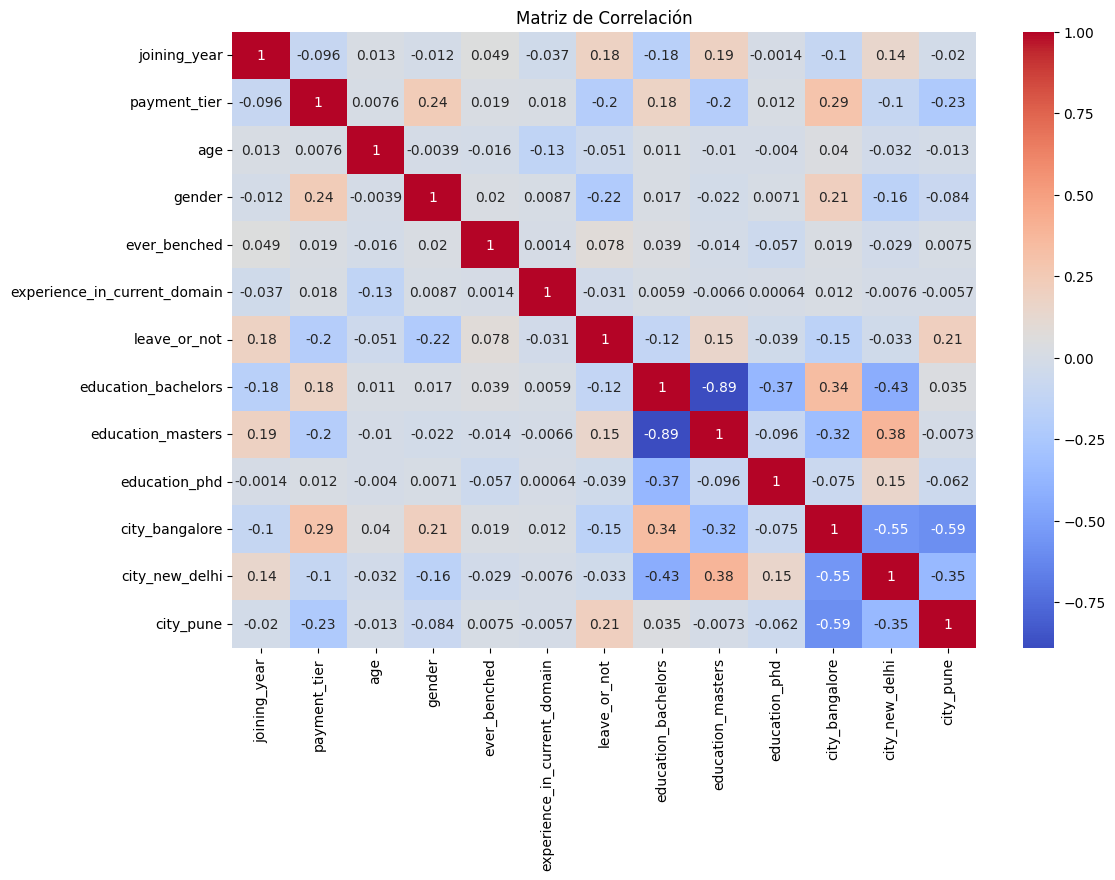

In [32]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()


Al observar la matriz de correlación, se pueden hacer varios análisis sobre la relación entre las variables del dataset

- ***education_bachelors*** y ***education_masters***: Existe una correlación negativa alta de -0.89 entre estas dos variables. Esto es esperado, ya que un empleado no puede tener simultáneamente una licenciatura y una maestría. Este tipo de correlación es lógica porque ambas representan niveles educativos mutuamente excluyentes.
- ***education_masters*** y ***education_phd***: La correlación negativa alta de -0.96 entre estas variables sugiere que, de manera similar, si un empleado tiene un título de maestría, es menos probable que tenga un PhD, ya que son títulos de educación diferentes y normalmente consecutivos.
- ***city_bangalore*** y ***city_pune***: Existe una correlación negativa alta de -0.59 entre estas dos variables, lo que también tiene sentido, ya que si un empleado está ubicado en una ciudad, no estará en otra.
- ***education_masters*** y ***city_new delhi***: Hay una correlación negativa moderada de -0.55, lo que sugiere que los empleados con maestría pueden ser menos propensos a trabajar en New Delhi, o viceversa.
- ***city_bangalore*** y ***city_new delhi***: También existe una correlación negativa moderada de -0.43, indicando que empleados de Bangalore y New Delhi tienden a estar distribuidos de manera inversa.

La mayoría de las demás variables muestran correlaciones muy bajas (cercanas a 0), lo que indica que no hay una fuerte relación lineal entre ellas.

#### Posibles preguntas
- ¿Por qué las variables de ciudad (Bangalore, Pune, New Delhi) muestran correlaciones negativas? ¿Hay alguna explicación organizacional para la distribución geográfica de los empleados?
- ¿Se espera que los empleados tengan niveles de educación mutuamente excluyentes, o es posible que existan combinaciones de títulos?
- ¿Por qué existe una fuerte relación inversa entre los niveles educativos? ¿Se refleja esto en la política de contratación de la empresa?
- ¿Hay algún sesgo en la recolección de datos que pueda estar influyendo en las correlaciones observadas?
- ¿Hay alguna política organizacional que explique las correlaciones negativas entre la educación y la ubicación?

# Hipótesis:
Los empleados con más experiencia en su dominio actual tienen menos probabilidades de abandonar la empresa.

### Descripción coloquial:
La idea detrás de esta hipótesis es que los empleados que han pasado más tiempo en su dominio actual probablemente estén más familiarizados con su trabajo, se sientan más cómodos y seguros en sus roles, y hayan desarrollado relaciones más fuertes con sus colegas y superiores. Esto podría hacer que estén menos inclinados a dejar la empresa, ya que cambiar de trabajo podría significar perder esas ventajas y tener que empezar de nuevo en un entorno desconocido.

### Pasos para contrastar la hipótesis:
Explorar la distribución de la variable de experiencia:
Primero, vamos a observar cómo se distribuye la variable experience_in_current_domain entre los empleados que han dejado la empresa y los que no.

### Análisis estadístico:
Realizaremos un análisis estadístico para comparar la media de la experiencia en el dominio actual entre los empleados que dejaron la empresa y los que se quedaron. Esto se puede hacer utilizando una prueba t-test de muestras independientes.

### Visualización:
Crearemos un gráfico de caja (box plot) que compare la distribución de la experiencia en el dominio actual entre los dos grupos (quienes se fueron y quienes se quedaron).

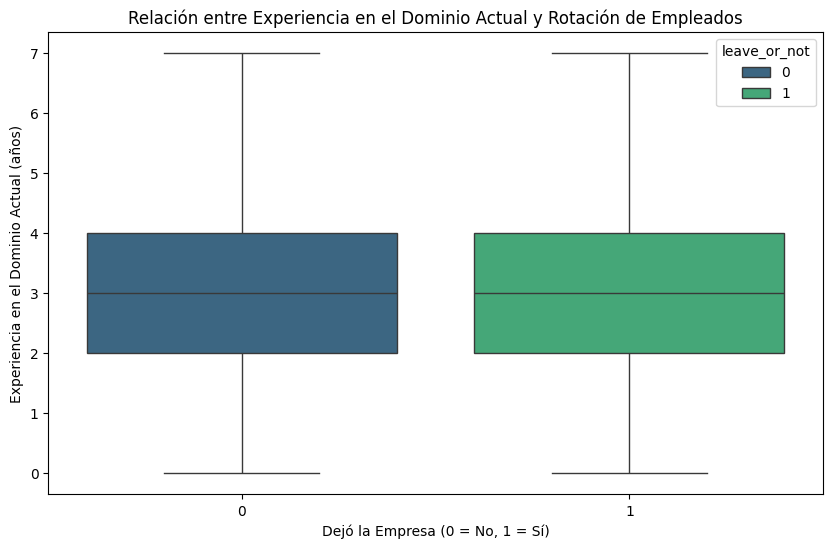

In [33]:
# Relación entre experience_in_current_domain y leave_or_not
plt.figure(figsize=(10, 6))
sns.boxplot(x='leave_or_not', hue='leave_or_not', y='experience_in_current_domain', data=df_employee, palette='viridis')
plt.title('Relación entre Experiencia en el Dominio Actual y Rotación de Empleados')
plt.xlabel('Dejó la Empresa (0 = No, 1 = Sí)')
plt.ylabel('Experiencia en el Dominio Actual (años)')
plt.show()

In [34]:
# Dividir los datos en dos grupos: quienes se fueron y quienes se quedaron
experience_stayed = df_employee[df_employee['leave_or_not'] == 0]['experience_in_current_domain']
experience_left = df_employee[df_employee['leave_or_not'] == 1]['experience_in_current_domain']

# Prueba t-test
t_stat, p_value = stats.ttest_ind(experience_stayed, experience_left)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretación
if p_value < 0.05:
    print("Existe una diferencia estadísticamente significativa en la experiencia entre quienes se quedaron y quienes se fueron.")
else:
    print("No hay una diferencia estadísticamente significativa en la experiencia entre quienes se quedaron y quienes se fueron.")


T-statistic: 2.08
P-value: 0.0375
Existe una diferencia estadísticamente significativa en la experiencia entre quienes se quedaron y quienes se fueron.


### Interpretación de resultados
#### T-statistic (2.08)
Este valor indica la magnitud de la diferencia entre los dos grupos (empleados que se quedaron y empleados que se fueron) en términos de experiencia en su dominio actual. Un valor positivo sugiere que, en promedio, los empleados que se quedaron tienen más experiencia en su dominio actual que aquellos que se fueron.

#### P-value (0.0375)
Dado que el p-value es menor que el umbral de significancia comúnmente utilizado de 0.05, podemos concluir que la diferencia en experiencia entre los dos grupos es estadísticamente significativa. Esto significa que es poco probable que la diferencia observada se deba al azar.

#### Conclusión:
La hipótesis se valida, existe una diferencia significativa en la experiencia en el dominio actual entre los empleados que se quedaron y los que se fueron. Específicamente, parece que aquellos con más experiencia en su dominio actual tienen menos probabilidades de abandonar la empresa.



# Presentación de hallazgos en base a los datos:
    

- Relación entre **payment_tier** y **leave_or_not**: Si se encuentra que los empleados en niveles de pago más bajos tienen una mayor tendencia a dejar la empresa, esto podría ser una señal importante para ajustar los incentivos o retención de empleados.

- Impacto de **ever_benched en leave_or_not**: Si los empleados que han estado sin asignaciones tienen una mayor probabilidad de dejar la empresa, esto podría ser un indicador de insatisfacción laboral.

- Relación entre **age** y **experience_in_current_domain**: La relación entre la edad y el año de ingreso podría revelar patrones de contratación o retención. Por ejemplo, si los empleados más jóvenes tienden a dejar la empresa con mayor frecuencia, esto podría ser relevante para el modelado y la estrategia de recursos humanos.

# Algunos hallazgos importantes del análisis inicial:

- Distribución de **leave_or_not**:

    El 65.6% de los empleados no han dejado la empresa, mientras que el 34.4% sí lo han hecho. Esto indica una distribución algo desbalanceada, lo que podría requerir técnicas específicas para el modelado, como ajuste de pesos o balanceo de clases.

- Relación entre **payment_tier** y **leave_or_not**:
  
    Los empleados en el nivel de pago 2 tienen la mayor tasa de abandono (59.9%), mientras que los del nivel 3 tienen la menor tasa (27.5%). Esto sugiere que los empleados en el nivel medio podrían estar más insatisfechos, o que las condiciones para ellos no son tan favorables.

  
- Impacto de **ever_benched** en **leave_or_not**:
  
    El 45.4% de los empleados que han estado sin asignaciones han dejado la empresa, en comparación con solo el 33.1% de los que no han estado sin asignaciones. Existe una fuerte correlación entre estar sin asignaciones y la decisión de dejar la empresa, lo que podría ser un indicador clave en el modelado de la retención de empleados.

# Impacto en el modelado:

- Desbalanceo en **leave_or_not**:
    Dado el desbalanceo, se debe considerar usar técnicas como el ajuste de pesos en los modelos de clasificación para evitar que el modelo simplemente prediga la clase mayoritaria.
  
- **payment_tier** y **ever_benched** como variables predictivas:
    Ambas variables muestran una fuerte correlación con leave_or_not, lo que sugiere que deben incluirse en cualquier modelo predictivo. Podrían mejorar significativamente la capacidad del modelo para predecir si un empleado dejará la empresa.

# Nuevas features que serían interesantes explorar a partir del dataset

Creemos que la incorporación de nuevas features podría mejorar el rendimiento del modelo al descubrir correlaciones adicionales en las variables derivadas:

- **Ratio de salario por antigüedad**: Esta variable se obtiene al dividir el salario del empleado entre sus años de antigüedad. Puede ser útil para identificar si los empleados con un salario relativamente alto para su antigüedad tienden a estar más satisfechos o a quedarse en la empresa.

- **Seniority**: Proponemos crear una variable categórica que clasifique a los empleados según su antigüedad en rangos ("Jr" para menos de 3 años, "Ssr" para 3-7 años, "Sr" para más de 7 años). Esto podría ayudar a segmentar el análisis de retención o satisfacción.

# Modelado

In [35]:
# Skips a los warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Dado que estamos trabajando en un problema de clasificación binaria (predecir si un empleado dejará la empresa o no), las consideraciones para la métrica de performance son:

- Desbalanceo de clases: En problemas como estos es común que una clase (por ejemplo, los empleados que se quedan) sea mucho más frecuente que la otra (los que se van). En este caso, la exactitud podría ser engañosa si simplemente predecimos la clase mayoritaria.

- Importancia de las métricas: Precision sería crucial si queremos minimizar las falsas alarmas, es decir, si queremos evitar etiquetar empleados que se quedarán como si fueran a irse. Recall es importante si nos preocupa más capturar a todos los empleados que tienen alta probabilidad de dejar la empresa, aunque esto implique un mayor número de falsos positivos.

F1-Score nos ofrece un balance entre precisión y recall, especialmente si ambas consecuencias (falsos positivos y falsos negativos) son igualmente importantes.

Optamos por elegir F1-Score debido a que esta métrica ofrece un balance entre precisión y recall.

In [36]:
from sklearn.pipeline import Pipeline
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

In [37]:
# Constants

RANDOM_STATE = 42

MAPPER = DataFrameMapper([
    (['joining_year'], [StandardScaler()]),
    (['age'], [StandardScaler()]),
    (['payment_tier'], [StandardScaler()]),
    (['experience_in_current_domain'], [StandardScaler()]),
    (['gender'], [StandardScaler()]),  
    (['education_bachelors'], [StandardScaler()]),
    (['education_masters'], [StandardScaler()]),
    (['education_phd'], [StandardScaler()]),
    (['city_bangalore'], [StandardScaler()]),
    (['city_new_delhi'], [StandardScaler()]),
    (['city_pune'], [StandardScaler()]),
])

In [38]:
# 60% train, 20% test, 20% validation

def buildDatasets(df_employee=df_employee, test_size=0.4, val_size=0.5, random_state=RANDOM_STATE):
    global train, validation, test
    
    # Dividir en entrenamiento y el resto
    train, not_train = train_test_split(df_employee, test_size=test_size, random_state=random_state)
    
    # Dividir el resto en validación y prueba
    validation, test = train_test_split(not_train, test_size=val_size, random_state=random_state)
    
    # Retornar las formas de los datasets
    return train.shape, validation.shape, test.shape

buildDatasets()

((2791, 13), (931, 13), (931, 13))

In [39]:
# Utils

def evaluate_model(model, set_names=('train', 'validation', 'test'), title='', show_cm=True):
    if title:
        print(title)  # Cambié display por print para evitar problemas con Jupyter Notebook
 
    final_metrics = {
        'Accuracy': [],
        'Precision': [],
        'Recall': [],
        'F1': [],        
    }
    
    cm_plots = []  # Lista para almacenar los objetos de las matrices de confusión
    
    for i, set_name in enumerate(set_names):
        assert set_name in ['train', 'validation', 'test']
        set_data = globals()[set_name]  # <- hack feo...

        y = set_data.leave_or_not
        y_pred = model.predict(set_data)
        final_metrics['Accuracy'].append(metrics.accuracy_score(y, y_pred))
        final_metrics['Precision'].append(metrics.precision_score(y, y_pred))
        final_metrics['Recall'].append(metrics.recall_score(y, y_pred))
        final_metrics['F1'].append(metrics.f1_score(y, y_pred))
        
        if show_cm:
            cm = metrics.confusion_matrix(y, y_pred)
            cm_plot = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, 
                                                     display_labels=['leave', 'not leave'])
            cm_plots.append(cm_plot)  # Guardar el objeto de la matriz de confusión
    
    # Mostrar el DataFrame con métricas
    metrics_df = pd.DataFrame(final_metrics, index=set_names)
    print(metrics_df)

    # Crear gráficos de barras horizontales
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    metrics_df.plot(kind='barh', ax=ax)
    ax.set_xlabel('Score')
    ax.set_title('Model Evaluation Metrics')
    plt.show()

    # Crear subplots para las matrices de confusión
    if show_cm:
        num_plots = len(cm_plots)
        fig, axs = plt.subplots(1, num_plots, figsize=(num_plots * 6, 6))
        for i, cm_plot in enumerate(cm_plots):
            cm_plot.plot(ax=axs[i], cmap="Blues", colorbar=False)
            axs[i].set_title(set_names[i])
            axs[i].set_xlabel('Predicted')
            axs[i].set_ylabel('True')
        plt.tight_layout()
        plt.show()

# Logistic Regression

El primer modelo que vamos a probar es una regresión logistica.

In [40]:
# Creamos el pipeline
pipeline_logistic_regression = Pipeline([
    ('mapper', MAPPER),
    ('classifier', LogisticRegression(random_state=RANDOM_STATE)),
])

# Entrenamos
pipeline_logistic_regression.fit(train, train.leave_or_not)

Pipeline(steps=[('mapper',
                 DataFrameMapper(drop_cols=[],
                                 features=[(['joining_year'],
                                            [StandardScaler()]),
                                           (['age'], [StandardScaler()]),
                                           (['payment_tier'],
                                            [StandardScaler()]),
                                           (['experience_in_current_domain'],
                                            [StandardScaler()]),
                                           (['gender'], [StandardScaler()]),
                                           (['education_bachelors'],
                                            [StandardScaler()]),
                                           (['education_masters'],
                                            [StandardScaler()]),
                                           (['education_phd'],
                                            [StandardScaler()]),
                                           (['city_bangalore'],
                                            [StandardScaler()]),
                                           (['city_new_delhi'],
                                            [StandardScaler()]),
                                           (['city_pune'],
                                            [StandardScaler()])])),
                ('classifier', LogisticRegression(random_state=42))])

In [41]:
y_pred = pipeline_logistic_regression.predict(validation)

Logistic Regression
            Accuracy  Precision    Recall        F1
train       0.738445   0.701209  0.421599  0.526589
validation  0.723953   0.664894  0.391850  0.493097
test        0.749731   0.720207  0.437107  0.544031


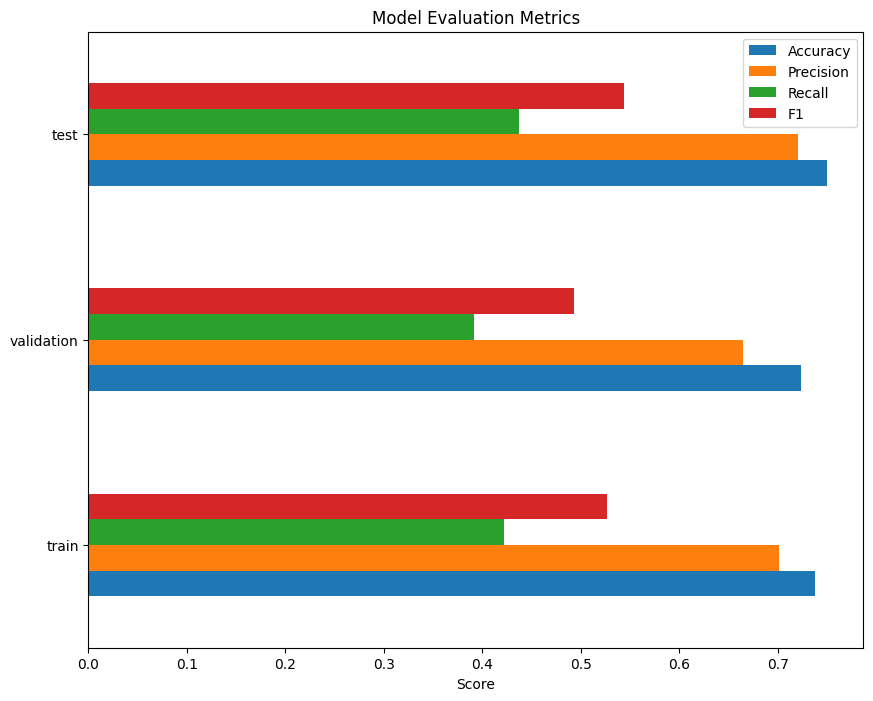

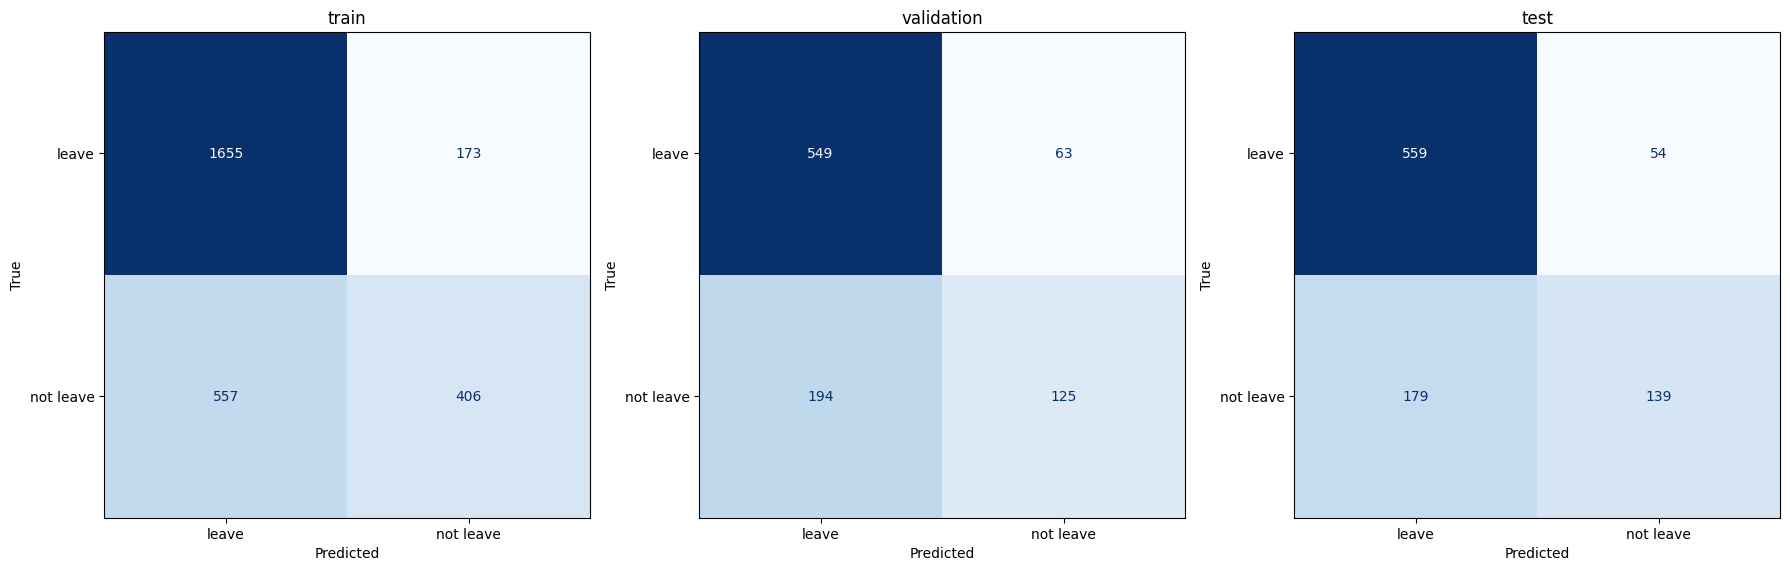

In [42]:
evaluate_model(pipeline_logistic_regression, title='Logistic Regression')

## Resultados
El modelo muestra un rendimiento razonable en términos de exactitud, pero tanto la precisión como el recall están por debajo de lo esperado, especialmente en el conjunto de validación.

El descenso en los valores del conjunto de validación se debe a que el modelo podría no generalizar bien a datos no vistos.

In [43]:
# Podemos obtener los pesos que aprendió la regresión logística
clf = pipeline_logistic_regression.named_steps['classifier']
clf.coef_  

array([[ 0.36441695, -0.08983053, -0.19697762, -0.07392409, -0.44193648,
        -0.13708391,  0.18492433, -0.0790646 , -0.02623615, -0.2713513 ,
         0.29653042]])

<Axes: xlabel='coeficiente', ylabel='feature'>

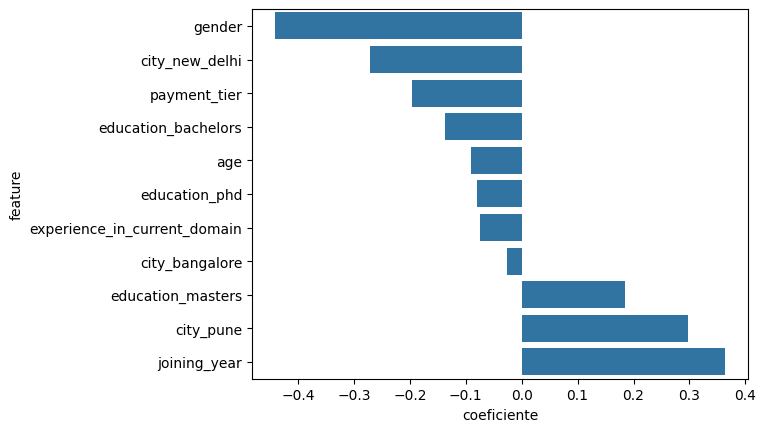

In [44]:
# Vamos a renderizar la importancia de cada feature

df_importance = pd.DataFrame({
    'feature': MAPPER.transformed_names_, 
    'coeficiente': clf.coef_[0],
}).sort_values(by='coeficiente')

sns.barplot(data=df_importance, x='coeficiente', y='feature')

# Segundo modelo: Arboles de decisión

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelBinarizer

Decision Tree
            Accuracy  Precision    Recall        F1
train       0.932999   0.970874  0.830737  0.895355
validation  0.803437   0.750000  0.639498  0.690355
test        0.806660   0.755556  0.641509  0.693878


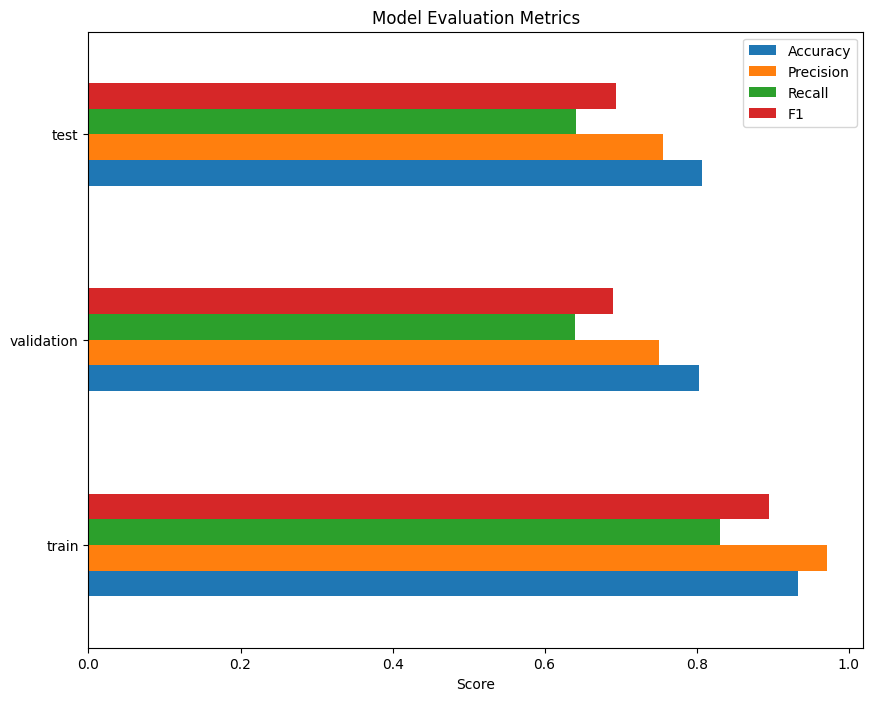

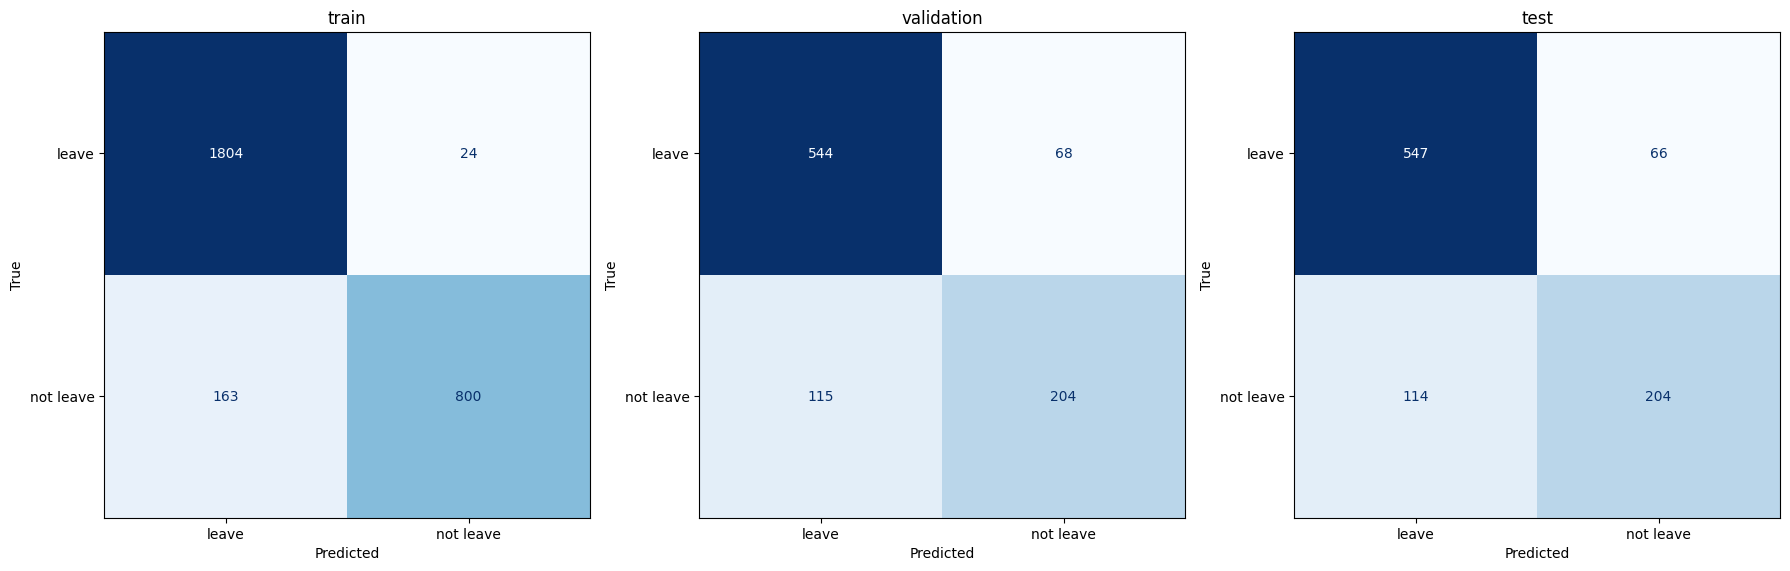

In [46]:
tree_model = DecisionTreeClassifier(random_state=RANDOM_STATE)

pipeline_tree_model = Pipeline([
    ('mapper', MAPPER),
    ('classifier', tree_model),
])

pipeline_tree_model.fit(train, train.leave_or_not)

evaluate_model(pipeline_tree_model, title='Decision Tree')

## Resultados

Podemos interpretar que el modelo está sobreajustando (Overfitting) a los datos de entrenamiento, dado el gran desempeño en el conjunto de entrenamiento y la disminución notable en el conjunto de validación.

Aunque el modelo tiene una precisión aceptable en el conjunto de validación, la caída en recall y F1 score indica que su capacidad de generalización es limitada.

Posibles acciones:
- Ajustar la profundidad máxima del árbol: Limitar la profundidad máxima puede evitar que el modelo aprenda demasiado los detalles específicos del conjunto de entrenamiento.
- Probar otros algoritmos: Quizás un modelo como Random Forest o Gradient Boosting podría ofrecer un mejor balance entre sesgo y varianza.

Decision Tree with depth limit
            Accuracy  Precision    Recall        F1
train       0.790398   0.844891  0.480789  0.612839
validation  0.787325   0.813472  0.492163  0.613281
test        0.781955   0.814208  0.468553  0.594810


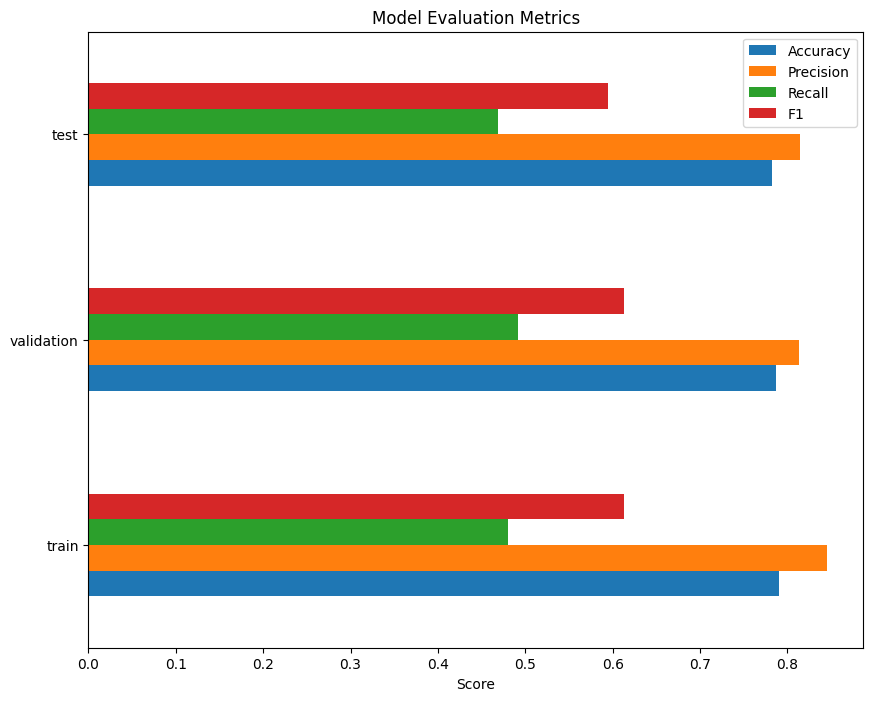

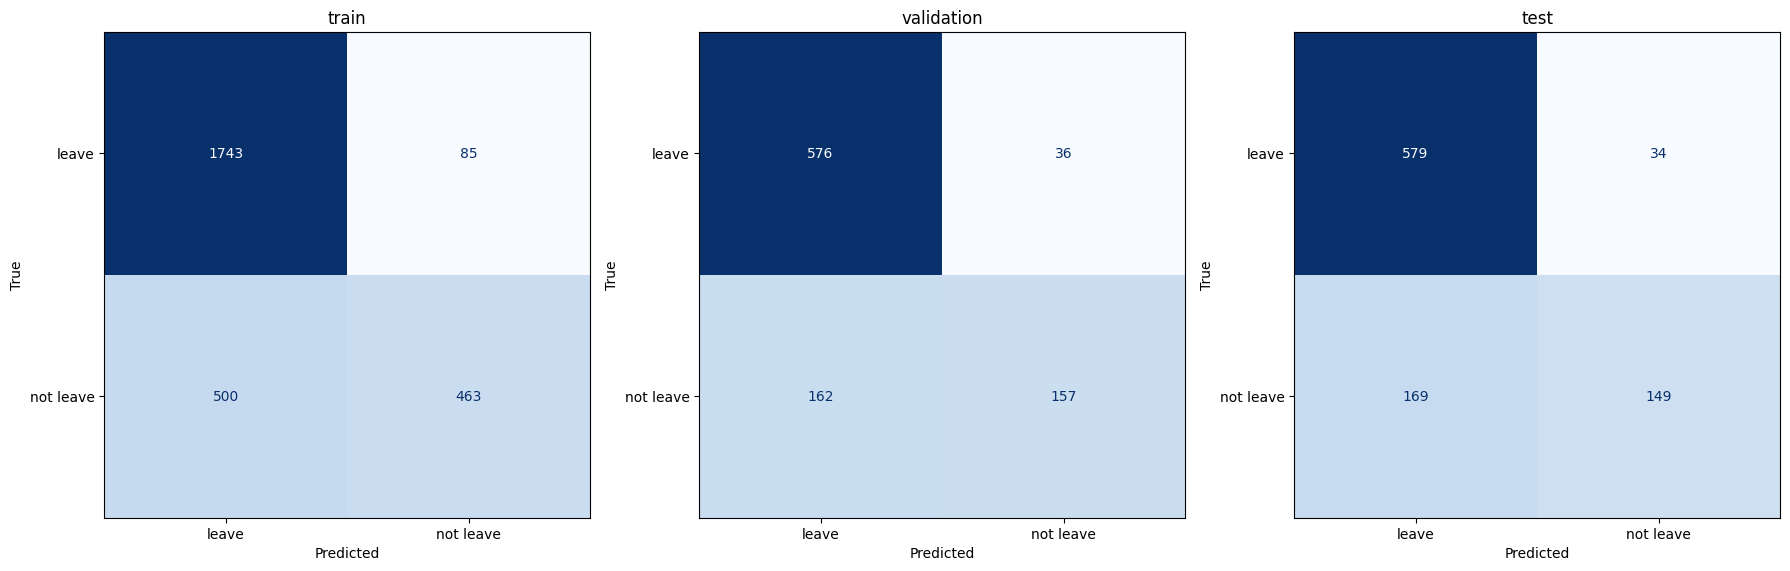

In [47]:
tree_model_limit = DecisionTreeClassifier(max_depth=3, random_state=RANDOM_STATE)

pipeline_tree_model_limit = Pipeline([
    ('mapper', MAPPER),
    ('classifier', tree_model_limit),
])

pipeline_tree_model_limit.fit(train, train.leave_or_not)

evaluate_model(pipeline_tree_model_limit, title='Decision Tree with depth limit')

## Resultados 

El modelo generaliza bien, ya que las métricas son consistentes entre los conjuntos de entrenamiento y validación. También el modelo tiene una buena precisión, pero el recall es más bajo, lo que indica que es mejor en evitar falsos positivos que en detectar todos los verdaderos positivos.

Al limitar la profundidad máxima a 3 niveles el modelo es más simple y es menos probable que se sobreajuste. Esta simplicidad también puede hacer que el modelo sea más interpretable.

En resumen, el modelo generaliza bien, aunque en recall la métrica es baja. Esto significa que el modelo tiene una capacidad moderada para detectar casos positivos, pero no está capturando todos los verdaderos positivos.

# Grid Search


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn_clf = KNeighborsClassifier(n_neighbors=1)
parameters = {'n_neighbors': [1, 3, 5, 8, 10,12, 15, 20, 50, 100]}

clf = GridSearchCV(knn_clf, parameters, refit=True, verbose=1)

pipeline_gs = Pipeline([
    ('mapper', MAPPER),
    ('classifier', clf),
])

pipeline_gs.fit(train, train.leave_or_not)

clf.best_score_, clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


(np.float64(0.7882438558357538), {'n_neighbors': 8})

Knn from Grid Search
            Accuracy  Precision    Recall        F1
train       0.834110   0.909836  0.576324  0.705658
validation  0.819549   0.871921  0.554859  0.678161
test        0.810956   0.858586  0.534591  0.658915


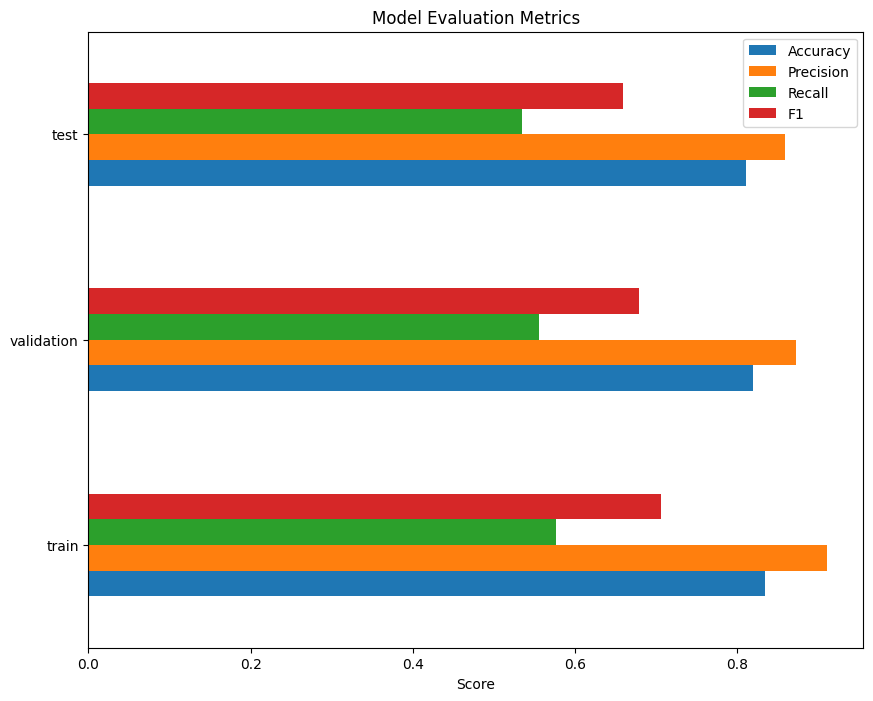

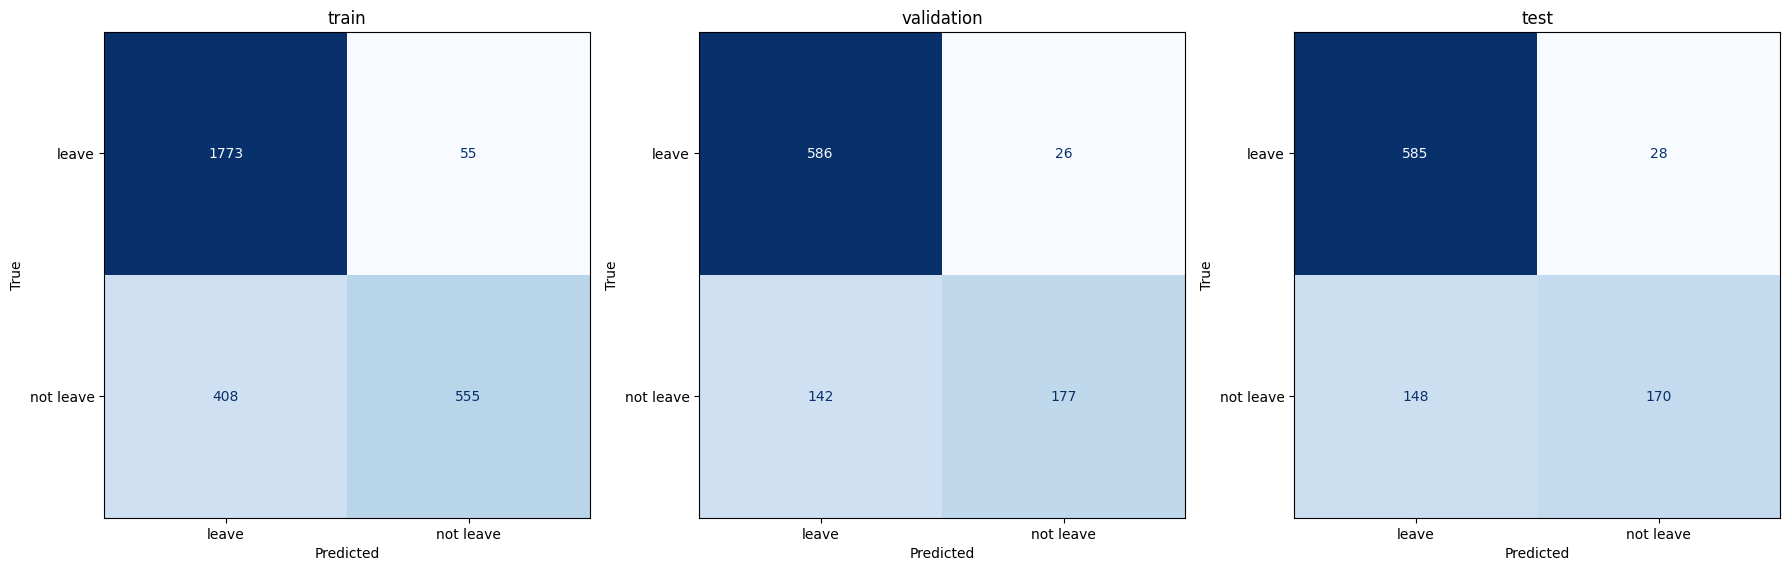

In [50]:
evaluate_model(pipeline_gs, title='Knn from Grid Search')

## Resultados

El modelo de KNN muestra una buena capacidad de generalización, con métricas que son consistentes entre los conjuntos de entrenamiento y validación. La pequeña disminución en la precisión y el F1 score en el conjunto de validación sugiere un ajuste adecuado, aunque podría haber una ligera inclinación hacia el sobreajuste.

El modelo tiene una alta precisión, lo que es positivo si queremos minimizar los falsos positivos. Sin embargo, el recall moderado indica que el modelo podría estar perdiendo algunos verdaderos positivos.

El uso de Grid Search ayudó a encontrar un buen balance, pero podríamos explorar mejorar el recall.

In [51]:
parameters = {'n_estimators': [100, 200], 
              'max_depth':[3, 5, 8],
              'max_features': [2, 5]}

forest_model = RandomForestClassifier(random_state=RANDOM_STATE)
clf = GridSearchCV(forest_model, parameters, refit=True, verbose=1)

pipeline_clf = Pipeline([
    ('mapper', MAPPER),
    ('classifier', clf),
])

pipeline_clf.fit(train, train.leave_or_not)

clf.best_score_, clf.best_params_


Fitting 5 folds for each of 12 candidates, totalling 60 fits


(np.float64(0.841630279364713),
 {'max_depth': 8, 'max_features': 5, 'n_estimators': 200})

Random Forest from Grid Search
            Accuracy  Precision    Recall        F1
train       0.880688   0.925676  0.711319  0.804463
validation  0.860365   0.876494  0.689655  0.771930
test        0.854995   0.867470  0.679245  0.761905


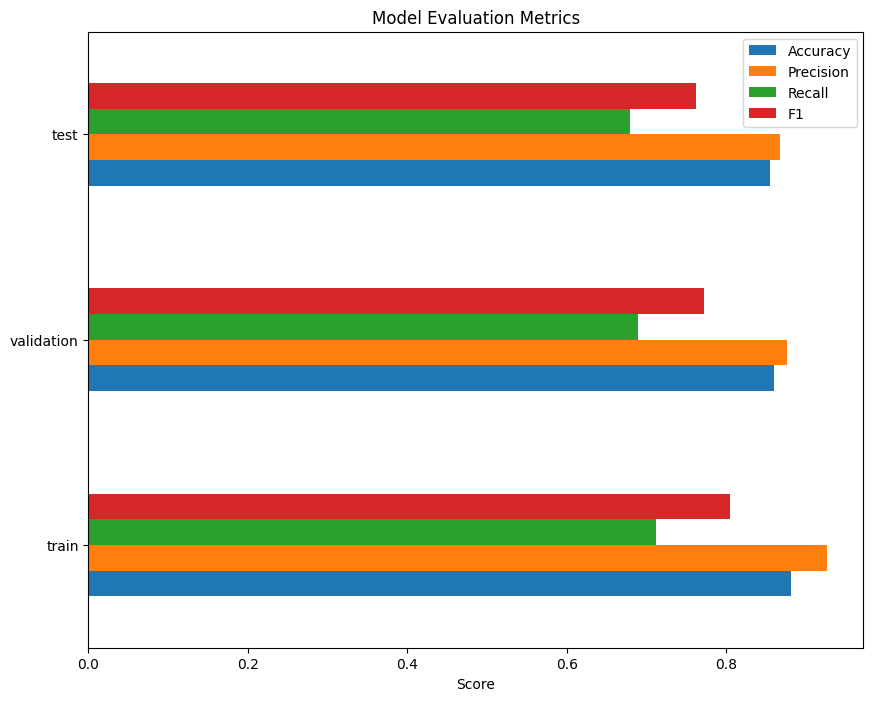

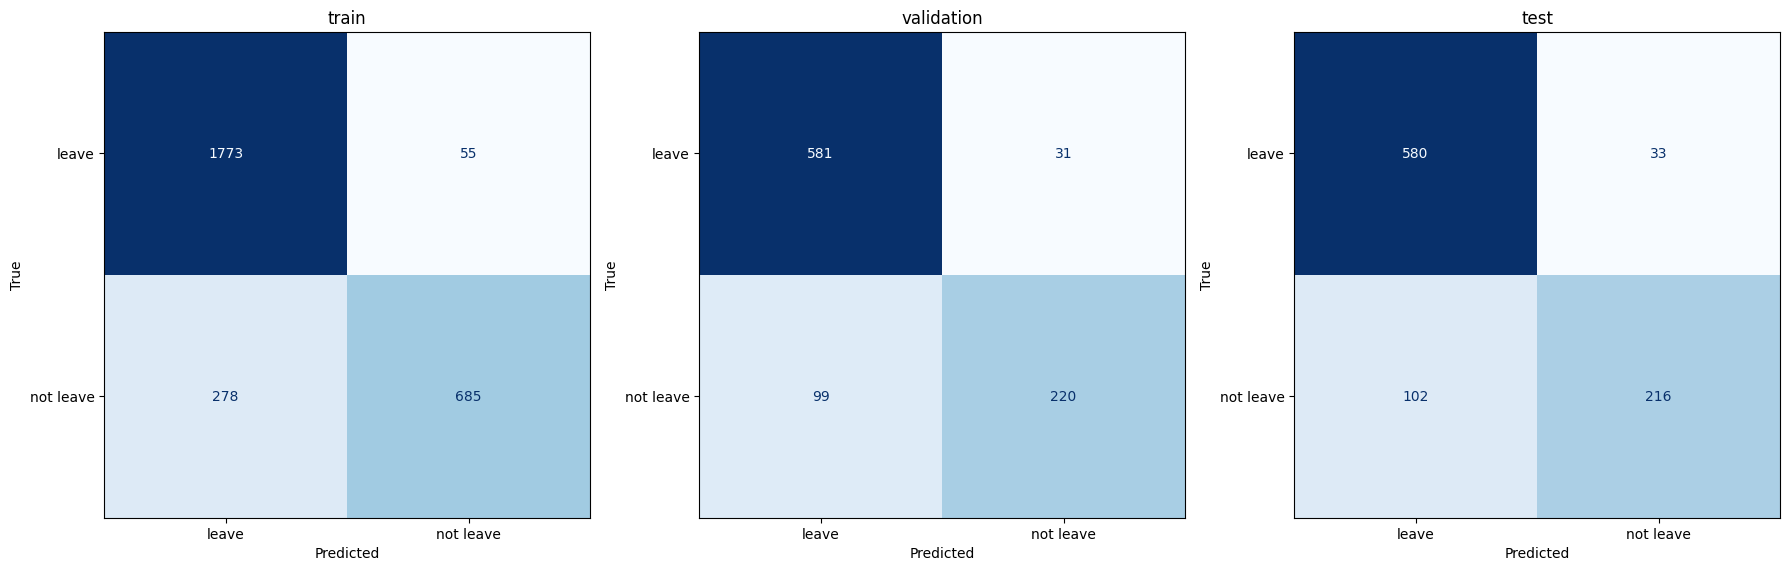

In [52]:
evaluate_model(pipeline_clf, title='Random Forest from Grid Search')

## Resultados

El modelo Random Forest generaliza bien, con métricas que son consistentes entre los conjuntos de entrenamiento y validación. La pequeña caída en las métricas en el conjunto de validación sugiere que el modelo es robusto y ha evitado un sobreajuste significativo.

Por otra parte, el modelo logra un buen equilibrio entre precisión y recall, lo que se refleja en el alto F1 score. Esto indica que el modelo no solo es efectivo en minimizar falsos positivos, sino que también captura una buena proporción de verdaderos positivos.

El uso de Grid Search como en el caso que exploramos más arriba ayudó a encontrar un conjunto de hiperparámetros que permite que el modelo rinda de manera óptima, balanceando bien entre la complejidad del modelo y su capacidad para generalizar.

# Nueva features

In [58]:
# Crear la columna con el ratio de salario por antigüedad
df_employee['ratio_salary_seniority'] = np.where(
    df_employee['experience_in_current_domain'] != 0,
    df_employee['payment_tier'] / df_employee['experience_in_current_domain'],
    0  # Asignar 0 cuando la experiencia es 0
)

# Crear el scaler
scaler = StandardScaler()

# Ajustar el scaler con los datos
df_employee['ratio_salary_seniority'] = scaler.fit_transform(df_employee['ratio_salary_seniority'].values.reshape(-1, 1))

# Mostrar los primeros registros
df_employee.head()

,joining_year,payment_tier,age,gender,ever_benched,experience_in_current_domain,leave_or_not,education_bachelors,education_masters,education_phd,city_bangalore,city_new_delhi,city_pune,ratio_salary_seniority
0,2017,3,34,1,0,0,0,1,0,0,1,0,0,-1.348440
1,2013,1,28,0,0,3,1,1,0,0,0,0,1,-0.913671
2,2014,3,38,0,0,2,0,1,0,0,0,1,0,0.608018
3,2016,3,27,1,0,5,1,0,1,0,1,0,0,-0.565856
4,2017,3,24,1,1,2,1,0,1,0,0,0,1,0.608018


In [59]:
MAPPER_NEW_FEATURE = DataFrameMapper([
    (['joining_year'], [StandardScaler()]),
    (['age'], [StandardScaler()]),
    (['payment_tier'], [StandardScaler()]),
    (['experience_in_current_domain'], [StandardScaler()]),
    (['gender'], [StandardScaler()]),  
    (['education_bachelors'], [StandardScaler()]),
    (['education_masters'], [StandardScaler()]),
    (['education_phd'], [StandardScaler()]),
    (['city_bangalore'], [StandardScaler()]),
    (['city_new_delhi'], [StandardScaler()]),
    (['city_pune'], [StandardScaler()]),
    (['ratio_salary_seniority'], None), 
])

In [60]:
buildDatasets()

((2791, 14), (931, 14), (931, 14))

In [61]:
parameters = {'n_estimators': [100, 200], 
              'max_depth':[3, 5, 8],
              'max_features': [2, 5]}

forest_model = RandomForestClassifier(random_state=RANDOM_STATE)
clf = GridSearchCV(forest_model, parameters, refit=True, verbose=1)

pipeline_clf_ratio_salary_seniority = Pipeline([
    ('mapper', MAPPER_NEW_FEATURE),
    ('classifier', clf),
])

pipeline_clf_ratio_salary_seniority.fit(train, train.leave_or_not)

clf.best_score_, clf.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


(np.float64(0.8405562929193836),
 {'max_depth': 8, 'max_features': 5, 'n_estimators': 200})

Random Forest from Grid Search with new features
            Accuracy  Precision    Recall        F1
train       0.881763   0.924832  0.715472  0.806792
validation  0.860365   0.879518  0.686520  0.771127
test        0.852846   0.860558  0.679245  0.759227


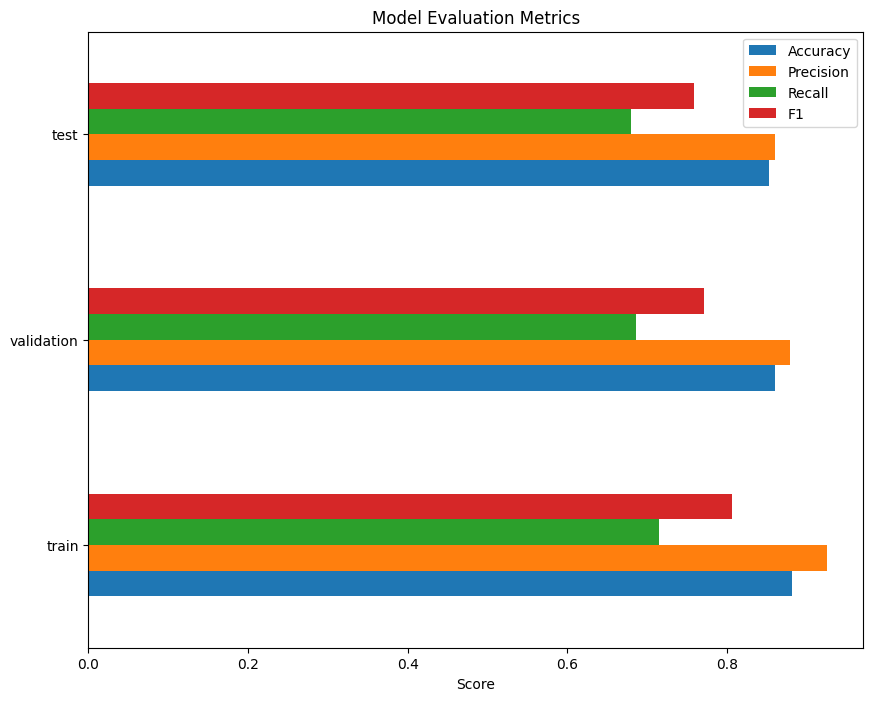

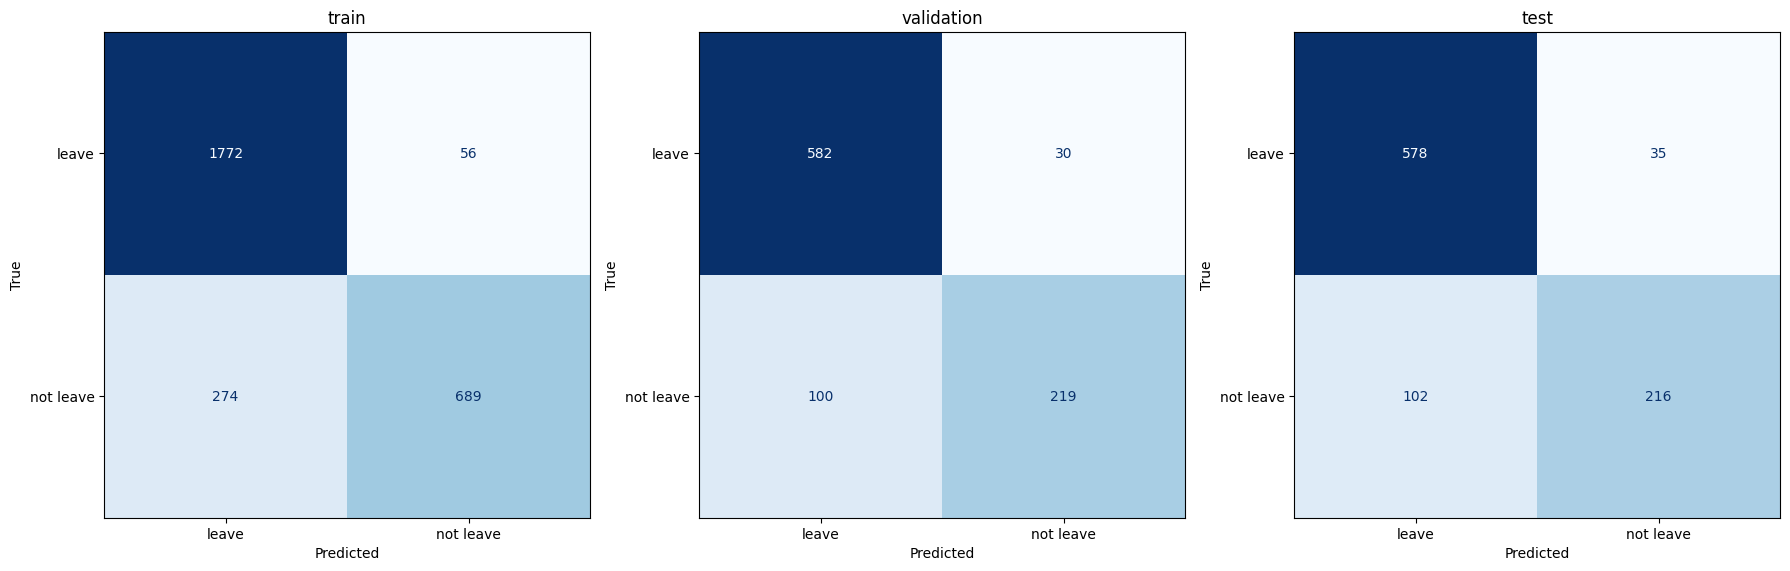

In [62]:
evaluate_model(pipeline_clf_ratio_salary_seniority, title='Random Forest from Grid Search with new features')

# Resultados 

La nueva feature podría no ser relevante para este modelo debido a que obtenemos casi las mismas métricas que antes de generar la feature. Es posible que el modelo de Random Forest no esté encontrando un patrón útil en esta nueva variable, puede que la relación entre el salario y la antigüedad no sea tan predictiva para el problema en cuestión.

/Users/jaira/tp-machine/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/jaira/tp-machine/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


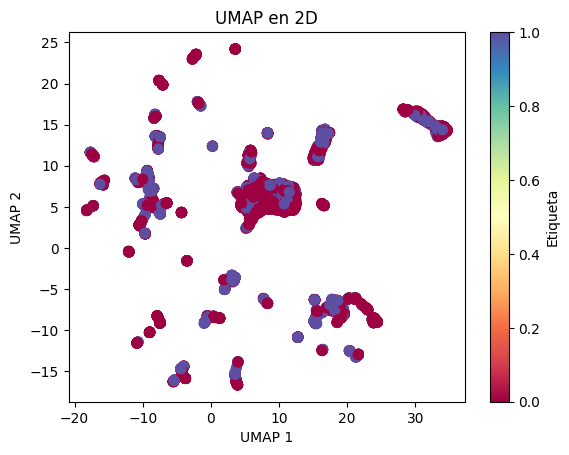

In [63]:
import umap

# Extrae las características (X) y etiquetas (y)
X = df_employee.drop(columns=['leave_or_not'])
y = df_employee['leave_or_not']
# Crear y ajustar el modelo UMAP
umap_model = umap.UMAP(n_components=2, random_state=RANDOM_STATE)
X_umap = umap_model.fit_transform(X)

# Graficar los datos transformados a dos dimensiones
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='Spectral', s=50)
plt.title('UMAP en 2D')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.colorbar(label='Etiqueta')
plt.show()


In [64]:
def plot_data(data, labels=None, title=None, legend=True, centroids=None):
    plt.figure(figsize=(7,5), dpi=100)
    if labels is not None:
        if isinstance(labels, list):
            labels = np.array(labels)

        unique_labels = list(sorted(set(x for x in labels if str(x) != '-1')))
        labels = np.array(list(map(str, labels)))
        if '-1' in labels:
            plt.scatter(data[labels=='-1', 0], data[labels=='-1', 1], s=5, c='black', alpha=0.5)


        for i, label in enumerate(unique_labels):
            label = str(label)
            plt.scatter(data[labels==label, 0], data[labels==label, 1], s=5, c='C{}'.format(i),
                        cmap='viridis', label=label, alpha=0.5)

            if centroids is not None:
                plt.scatter(centroids[i, 0], centroids[i, 1], s=250, c='white', marker='o')
                plt.scatter(centroids[i, 0], centroids[i, 1], s=100, marker='X')

        if legend:
            plt.legend(fontsize=10, markerscale=3, loc='upper left', bbox_to_anchor=(1, 1))
    else:
        plt.scatter(data[:, 0], data[:, 1], s=5, color='grey', alpha=0.5)

    if title:
        plt.title(title)
    plt.axis('off')

def load_mnist(size):
    np.random.seed(RANDOM_STATE)
    X, y = datasets.fetch_openml('mnist_784', version=1, return_X_y=True)
    sample_index = np.random.choice(list(range(len(X))), size=size, replace=False)
    digits_X = X.loc[sample_index]
    digits_y = y.loc[sample_index]
    return digits_X, digits_y

In [65]:
# Omitir warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [66]:
# Reducir la dimensionalidad a 2 componentes
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
emb = pca.fit_transform(X)

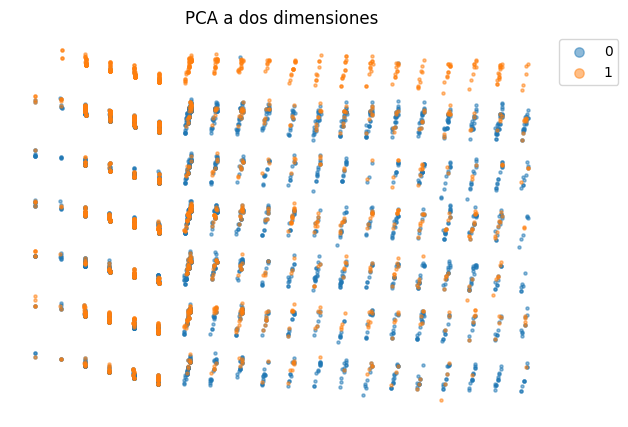

In [67]:
emb = PCA(n_components=2).fit_transform(X)
plot_data(emb, labels=y, title='PCA a dos dimensiones')

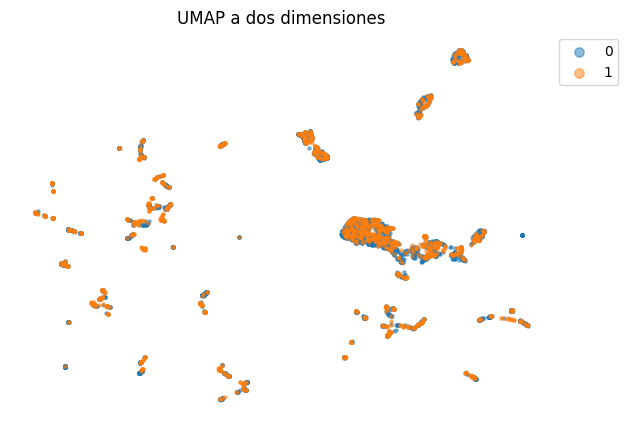

In [68]:
emb = UMAP().fit_transform(X)
plot_data(emb, labels=y, title='UMAP a dos dimensiones')

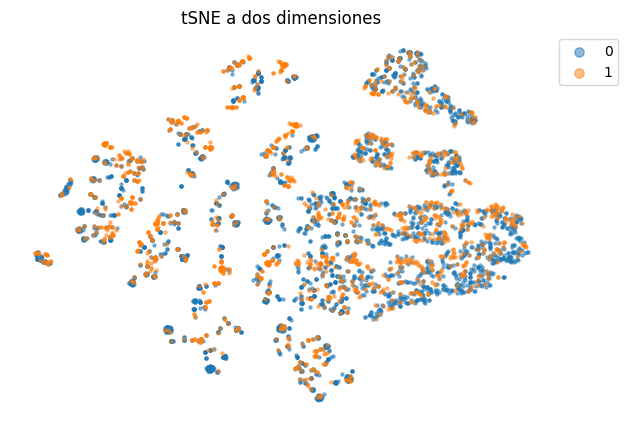

In [69]:
pca_emb = PCA(n_components=7).fit_transform(X)

emb = TSNE().fit_transform(pca_emb[:5000])

plot_data(emb, labels=y[:5000], title='tSNE a dos dimensiones')

# Resultados

1. PCA
   * Visualización: La distribución de los puntos muestra una separación parcial entre las dos clases (0 y 1), pero los puntos de ambas clases están mezclados a lo largo de varias direcciones. No se observa una clara separación lineal entre los grupos.
    * Conclusión: PCA es una técnica lineal que proyecta los datos a un espacio de menor dimensión preservando la varianza máxima, pero en este caso no parece ser muy eficaz para separar claramente las clases. Esto sugiere que los datos podrían no estar bien separados en términos lineales y que una técnica no lineal podría ser más adecuada.
      

3. UMAP
    * Visualización: Se observan algunas agrupaciones más definidas, con ciertas áreas donde los puntos de las clases 0 y 1 están mejor separados. Sin embargo, aún se ve que algunos puntos están entremezclados en varias regiones.
    * Conclusión: UMAP es una técnica no lineal que preserva la estructura local de los datos. Parece haber encontrado algunas agrupaciones más naturales dentro de los datos en comparación con PCA, lo que indica que los datos podrían tener una estructura compleja que UMAP es capaz de capturar mejor.

4. t-SNE
    * Visualización: En este gráfico, se pueden observar varias agrupaciones claras, con ciertas áreas donde las clases 0 y 1 están bien separadas. Hay más claridad en las agrupaciones en comparación con PCA y UMAP, aunque aún existen áreas con solapamiento.
    * Conclusión: t-SNE es muy eficaz en la preservación de las relaciones de distancia entre puntos cercanos, lo que explica la clara separación en ciertos grupos. Es una técnica no lineal que parece haber capturado patrones más claros que las otras dos técnicas, aunque debido a la naturaleza estocástica de t-SNE, las interpretaciones exactas deben tomarse con cuidado.

# Métrica para informar

Con el modelo Random Forest from Grid Search logramos una métrica de F1 Score con un 76% de efectividad.

Cuestiones adicionales a considerar:

* Interpretabilidad: Si bien el F1 Score refleja bien el balance entre falsos positivos y falsos negativos, los modelos como Random Forest pueden ser más difíciles de interpretar en comparación con modelos más simples como regresión logística.

* Tiempos de entrenamiento y complejidad computacional: Random Forest puede ser un modelo costoso en términos de tiempo de entrenamiento y predicción, especialmente si el número de árboles es alto. Si el tiempo de predicción o los recursos computacionales son limitados, puede ser necesario ajustar estos parámetros o considerar modelos más simples que proporcionen un equilibrio aceptable entre rendimiento y costo computacional.En este caso las features que estamos evaluando son pocas, la cantidad de datos no es muy elevada y el modelo tiene un tiempo aceptable (2s).

In [53]:
# Realizar predicciones con el mejor modelo encontrado por GridSearchCV
y_pred = pipeline_clf.predict(test)
test['pred'] = y_pred

# Agregar la columna de si la predicción fue correcta o no
test['correct'] = test['pred'] == test['leave_or_not']


In [78]:
combinations = [
    ("age", "experience_in_current_domain"),
    ("experience_in_current_domain", "joining_year"),
    ("experience_in_current_domain", "payment_tier"),
]

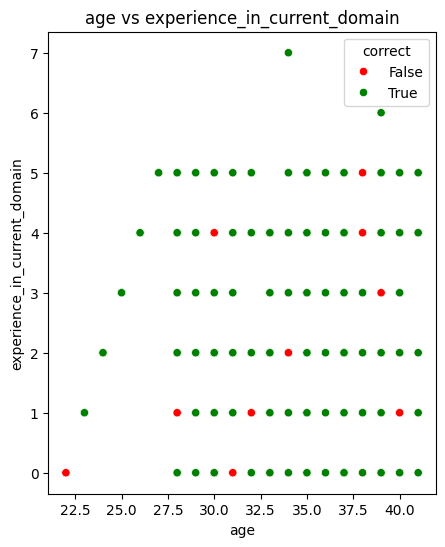

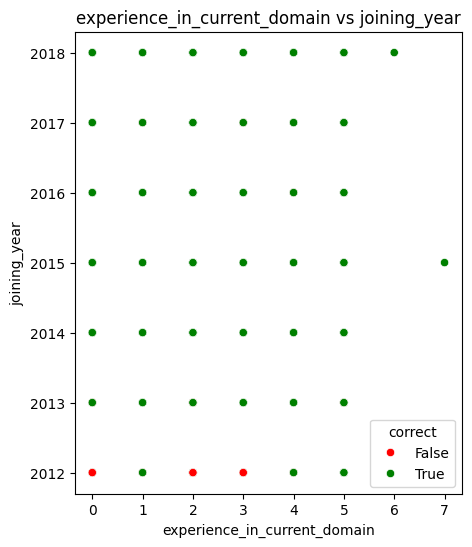

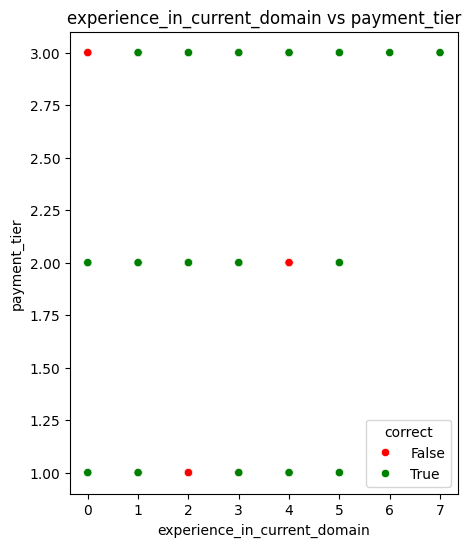

In [79]:
# Función para generar el diagrama de dispersión
def scatter_plot(df, var1, var2):
    plt.figure(figsize=(5, 6))
    
    # Crear el gráfico de dispersión con la columna 'correct' que indica aciertos y errores
    sns.scatterplot(x=var1, y=var2, hue='correct', data=df, palette={True: 'green', False: 'red'})
    plt.title(f'{var1} vs {var2}')
    plt.show()

for feature_1, feature_2 in combinations: 
    scatter_plot(test, feature_1, feature_2)


# Observaciones


age vs experience_in_current_domain

* Dispersión de datos: Los datos están bastante dispersos, lo que sugiere que no hay una relación lineal fuerte entre la edad y la experiencia. Es decir, no podemos decir que a mayor edad necesariamente haya mayor experiencia, o viceversa.
* Concentración de datos: Se observa una concentración de datos en ciertos rangos de experiencia, especialmente en los valores enteros (1, 2, 3, etc.). Esto podría indicar que la experiencia se mide en años completos o que hay cierta tendencia a redondear los valores.
* Los puntos rojos (afirmaciones falsas) se encuentran dispersos a lo largo de todo el rango de edades y experiencias, lo que indica que la falsedad de la afirmación no está claramente relacionada con ninguna de estas variables.

experience_in_current_domain vs joining_year
* Distribución uniforme por año: Los datos parecen estar distribuidos de manera relativamente uniforme a lo largo de los años de incorporación, lo que sugiere que la empresa ha tenido una tasa de contratación constante durante ese período.
* Relación lineal esperada: Intuitivamente, esperaríamos una relación positiva entre el año de incorporación y la experiencia en el dominio actual. Es decir, cuanto más reciente sea el año de incorporación, menor debería ser la experiencia. Sin embargo, el gráfico no muestra esta relación de manera clara.
* Ausencia de correlación: Los puntos no siguen una tendencia lineal definida, lo que indica que no hay una correlación fuerte entre ambas variables.

experience_in_current_domain vs payment_tier
* Distribución de datos: Los datos parecen concentrarse en ciertos niveles de pago, sugiriendo que podría haber categorías definidas o rangos salariales dentro de la empresa o industria.
* Relación limitada: A primera vista, no se observa una correlación lineal clara entre la experiencia y el nivel de pago. Es decir, no se puede afirmar con certeza que a mayor experiencia corresponda un nivel de pago más alto.
